<a href="https://colab.research.google.com/github/njiririkinyanjui/Unsupervised_Learning_In_R/blob/main/Part_1__R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Question

* You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax).
* Performing  T-SNE and PCA in the marketing dataset and later providing recommendations based on your insights.

* Loading the Data
* EDA 
* Dimensionality Reduction ( T-SNE and PCA)

# Loading the libraries and Dataset

## Loading the Libraries

In [ ]:
# Importing the relevant libraries

library(tidyverse)

install.packages("reshape",dependencies = TRUE) # Boxplot for outliers
library(reshape)

install.packages("psych") # helps with the describe function in EDA
library(psych)

install.packages("ggplot2")
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’



Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename


The following objects are masked from ‘package:tidyr’:

    expand, smiths


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is uns

## Data loading

In [ ]:
# Loading the data

p1 <- read.csv("/content/Supermarket_Dataset_1 - Sales Data.csv")

# Showing the Dataset
str(p1)

# Reading the first 6 rows of the datasets::
head(p1)

# Our dataset has 1000 unique attributes and 16 rows

'data.frame':	1000 obs. of  16 variables:
 $ Invoice.ID             : chr  "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" ...
 $ Branch                 : chr  "A" "C" "A" "A" ...
 $ Customer.type          : chr  "Member" "Normal" "Normal" "Member" ...
 $ Gender                 : chr  "Female" "Female" "Male" "Male" ...
 $ Product.line           : chr  "Health and beauty" "Electronic accessories" "Home and lifestyle" "Health and beauty" ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Time                   : chr  "13:08" "10:29" "13:23" "20:33" ...
 $ Payment                : chr  "Ewallet" "Cash" "Credit card" "Ewallet" ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.margin.percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ g

Invoice.ID  Branch Customer.type Gender Product.line           Unit.price
1 750-67-8428 A      Member        Female Health and beauty      74.69     
2 226-31-3081 C      Normal        Female Electronic accessories 15.28     
3 631-41-3108 A      Normal        Male   Home and lifestyle     46.33     
4 123-19-1176 A      Member        Male   Health and beauty      58.22     
5 373-73-7910 A      Normal        Male   Sports and travel      86.31     
6 699-14-3026 C      Normal        Male   Electronic accessories 85.39     
  Quantity Tax     Date      Time  Payment     cogs   gross.margin.percentage
1 7        26.1415 1/5/2019  13:08 Ewallet     522.83 4.761905               
2 5         3.8200 3/8/2019  10:29 Cash         76.40 4.761905               
3 7        16.2155 3/3/2019  13:23 Credit card 324.31 4.761905               
4 8        23.2880 1/27/2019 20:33 Ewallet     465.76 4.761905               
5 7        30.2085 2/8/2019  10:37 Ewallet     604.17 4.761905               
6 7        29.8865 3/25/2019 18:30 Ewallet     597.73 4.761905               
  gross.income Rating Total   
1 26.1415      9.1    548.9715
2  3.8200      9.6     80.2200
3 16.2155      7.4    340.5255
4 23.2880      8.4    489.0480
5 30.2085      5.3    634.3785
6 29.8865      4.1    627.6165

In [ ]:
# Understanding the shape of the dataset and attaching the row names to the runtime

dim(p1)

attach(p1)

[1] 1000   16

In [ ]:
# Checking the number of unique values in each column

lengths(lapply(p1, unique))

Invoice.ID                  Branch           Customer.type 
                   1000                       3                       2 
                 Gender            Product.line              Unit.price 
                      2                       6                     943 
               Quantity                     Tax                    Date 
                     10                     990                      89 
                   Time                 Payment                    cogs 
                    506                       3                     990 
gross.margin.percentage            gross.income                  Rating 
                      1                     990                      61 
                  Total 
                    990

* The Invoice Id has 1000 unique attributes / rows
* Their are three types of branches A, B and C
* Theirs only Male and Female in the gender column
* Quality Ranges from 1-10
* There are three modes of payments; Ewallet, Cash and Credit Card

## Data Cleaning

In [ ]:
# Checking for missing values

colSums(is.na(p1))

# Our dataset has no missing attributes

Invoice.ID                  Branch           Customer.type 
                      0                       0                       0 
                 Gender            Product.line              Unit.price 
                      0                       0                       0 
               Quantity                     Tax                    Date 
                      0                       0                       0 
                   Time                 Payment                    cogs 
                      0                       0                       0 
gross.margin.percentage            gross.income                  Rating 
                      0                       0                       0 
                  Total 
                      0

In [ ]:
# Checking for duplicates

any(duplicated(p1))

# No duplicates observed in our dataset

[1] FALSE

In [ ]:
# Creating a variable with only numeric attributes

p1_num <- p1[ , unlist(lapply(p1, is.numeric))]

# Previewing the dataset
head(p1_num)

Unit.price Quantity Tax     cogs   gross.margin.percentage gross.income
1 74.69      7        26.1415 522.83 4.761905                26.1415     
2 15.28      5         3.8200  76.40 4.761905                 3.8200     
3 46.33      7        16.2155 324.31 4.761905                16.2155     
4 58.22      8        23.2880 465.76 4.761905                23.2880     
5 86.31      7        30.2085 604.17 4.761905                30.2085     
6 85.39      7        29.8865 597.73 4.761905                29.8865     
  Rating Total   
1 9.1    548.9715
2 9.6     80.2200
3 7.4    340.5255
4 8.4    489.0480
5 5.3    634.3785
6 4.1    627.6165

Using  as id variables



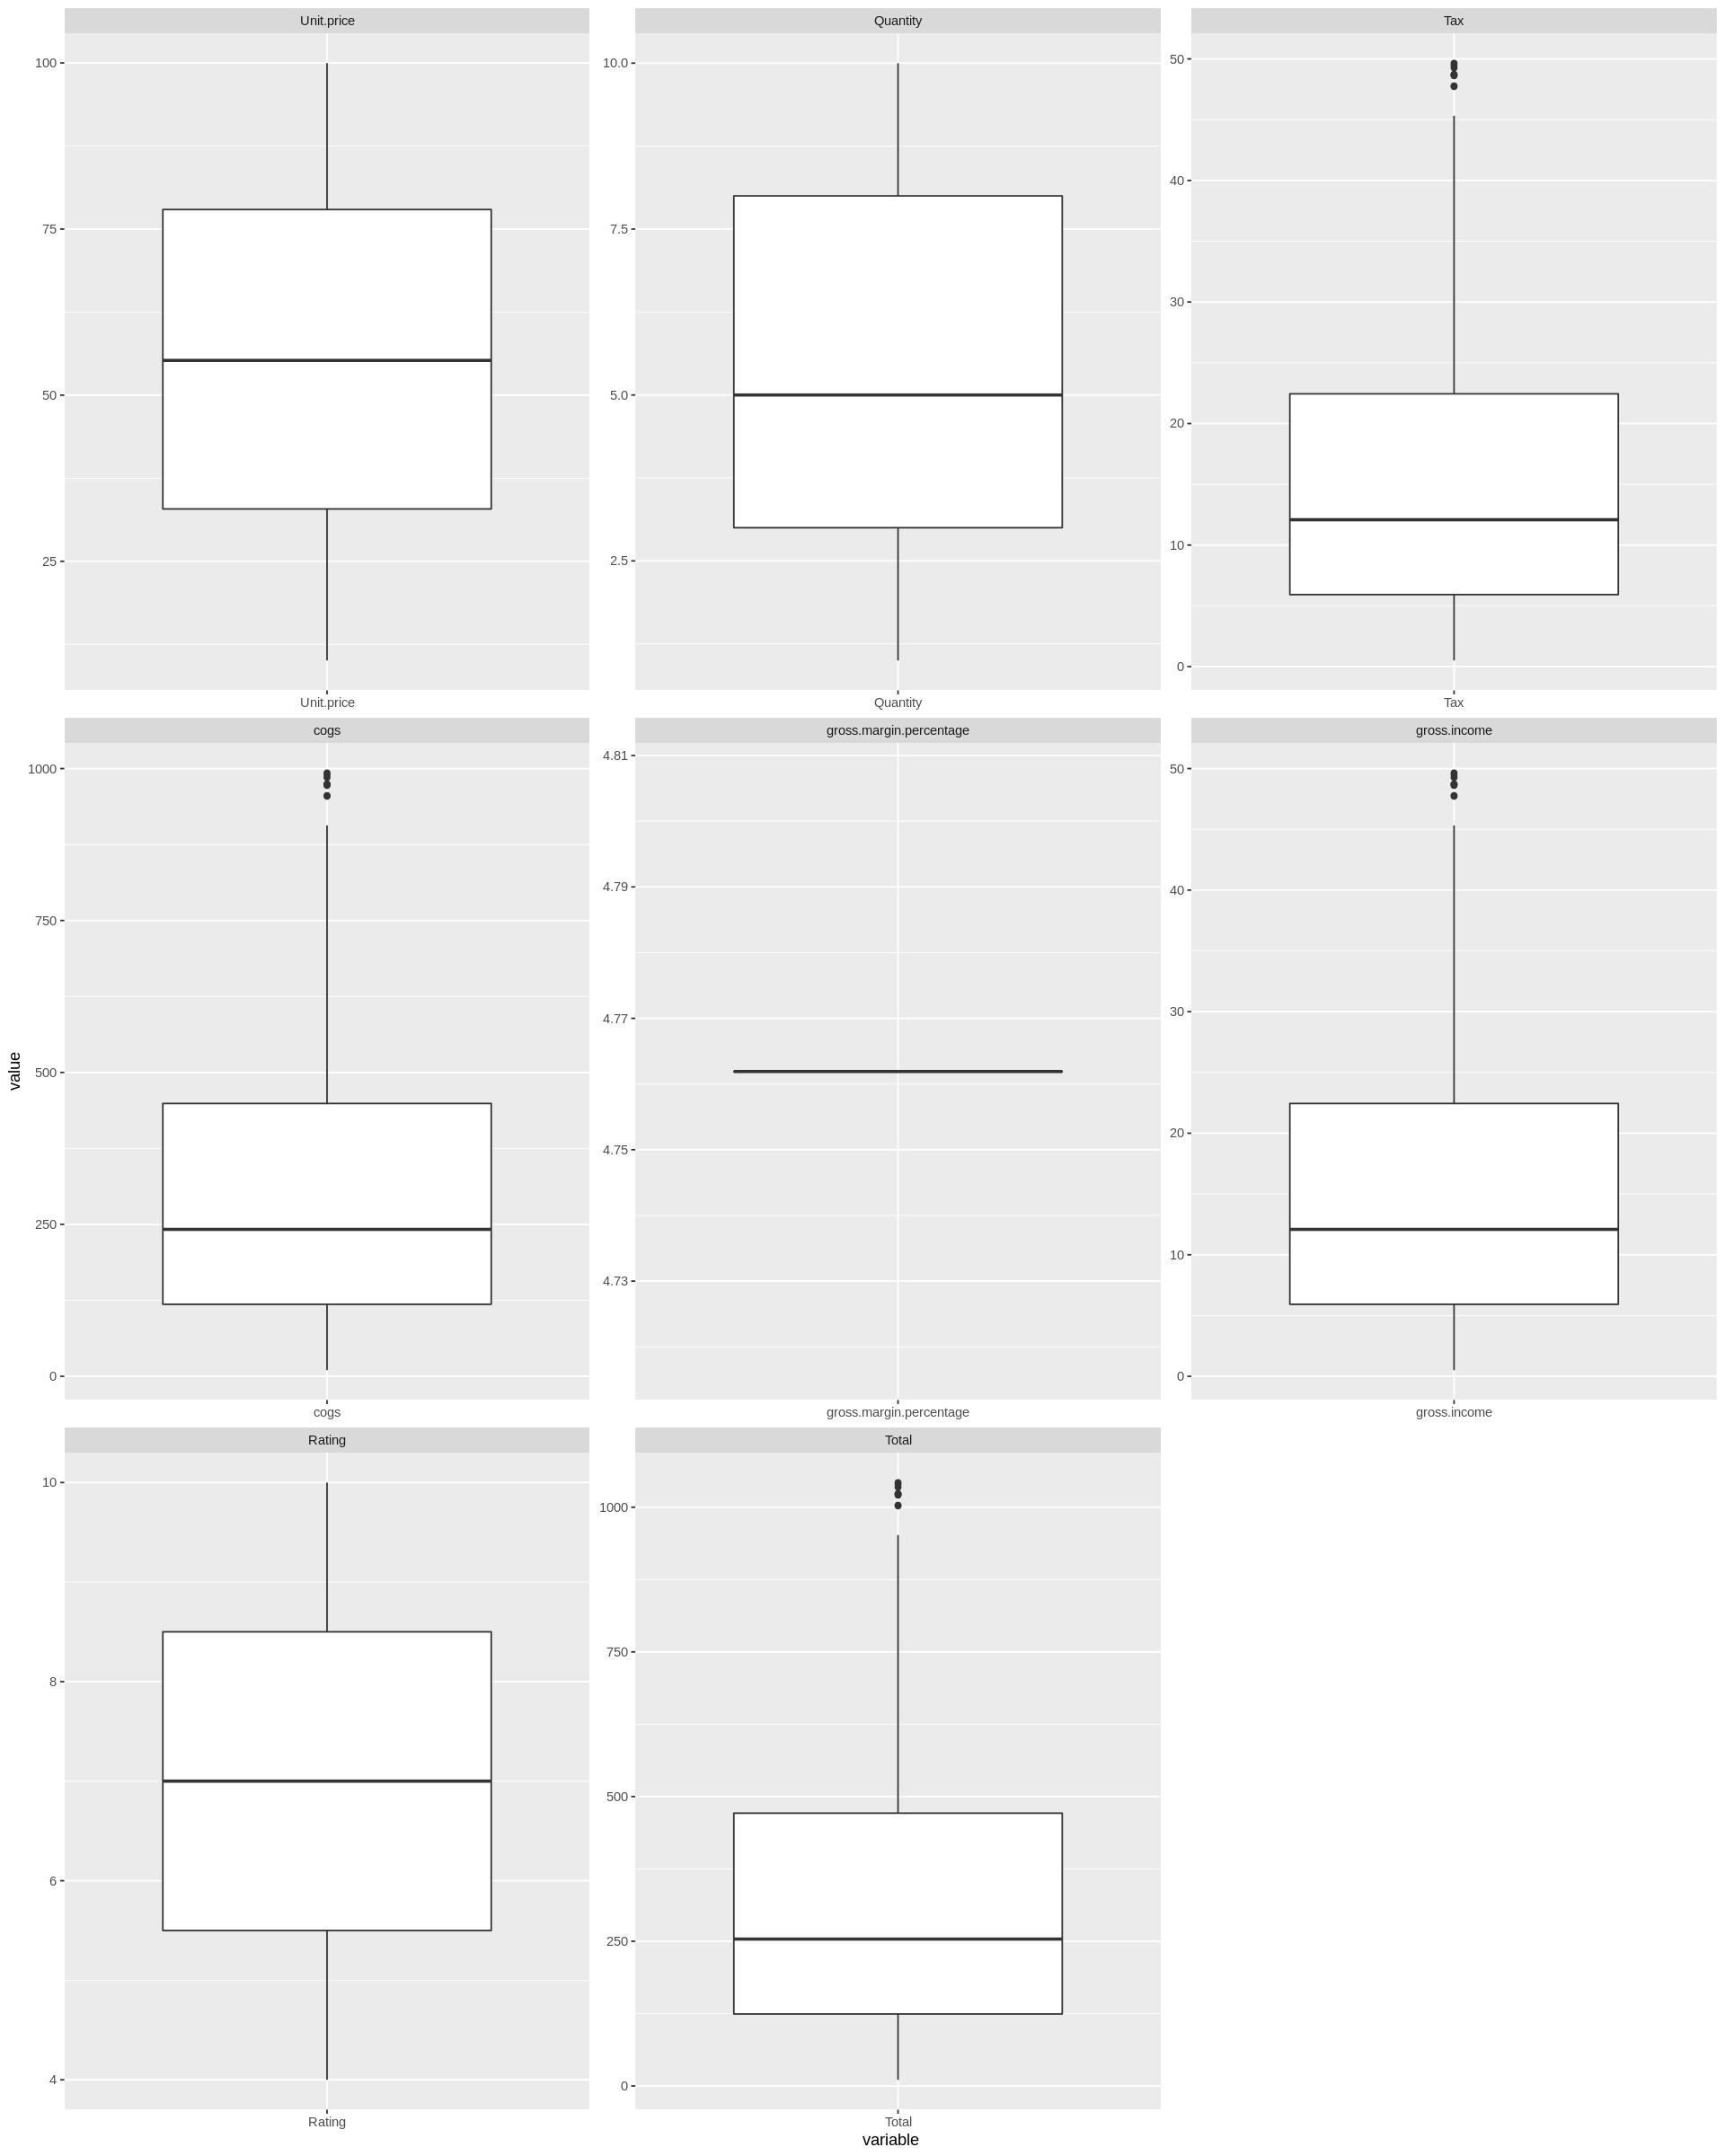

In [ ]:
# Plotting boxplots to check for outliers

options(repr.plot.width = 16, repr.plot.height = 20)
ggplot(melt(p1_num), aes(variable, value))+ geom_boxplot() + facet_wrap(~variable, scale="free")

# Few outliers were noticed on Tax, cogs, gross income and total rows

* We wont remove the outliers since they're are important to the study because the dataset wasn't a case study with questionairs but collected from three outlets with nominal data

# EDA

* Dealing with the numeric variables for the EDA

## Univariate

In [ ]:
# Viewing the statistical summary numeric columns of the dataset 
summary(p1_num)

   Unit.price       Quantity          Tax               cogs       
 Min.   :10.08   Min.   : 1.00   Min.   : 0.5085   Min.   : 10.17  
 1st Qu.:32.88   1st Qu.: 3.00   1st Qu.: 5.9249   1st Qu.:118.50  
 Median :55.23   Median : 5.00   Median :12.0880   Median :241.76  
 Mean   :55.67   Mean   : 5.51   Mean   :15.3794   Mean   :307.59  
 3rd Qu.:77.94   3rd Qu.: 8.00   3rd Qu.:22.4453   3rd Qu.:448.90  
 Max.   :99.96   Max.   :10.00   Max.   :49.6500   Max.   :993.00  
 gross.margin.percentage  gross.income         Rating           Total        
 Min.   :4.762           Min.   : 0.5085   Min.   : 4.000   Min.   :  10.68  
 1st Qu.:4.762           1st Qu.: 5.9249   1st Qu.: 5.500   1st Qu.: 124.42  
 Median :4.762           Median :12.0880   Median : 7.000   Median : 253.85  
 Mean   :4.762           Mean   :15.3794   Mean   : 6.973   Mean   : 322.97  
 3rd Qu.:4.762           3rd Qu.:22.4453   3rd Qu.: 8.500   3rd Qu.: 471.35  
 Max.   :4.762           Max.   :49.6500   Max.   :10.00

In [ ]:
# SUmmary statistics of the dataset

summary(p1)

  Invoice.ID           Branch          Customer.type         Gender         
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 Product.line         Unit.price       Quantity          Tax         
 Length:1000        Min.   :10.08   Min.   : 1.00   Min.   : 0.5085  
 Class :character   1st Qu.:32.88   1st Qu.: 3.00   1st Qu.: 5.9249  
 Mode  :character   Median :55.23   Median : 5.00   Median :12.0880  
                    Mean   :55.67   Mean   : 5.51   Mean   :15.3794  
                    3rd Qu.:77.94   3rd Qu.: 8.00   3rd Qu.:22.4453  
                    Max.   :99.96   Max. 

In [ ]:
# This function provides the ones most useful for scale construction and item analysis in classic psychometrics. 
# Range is most useful for the first pass in a data set, to check for coding errors.

describe(p1_num)

vars n    mean       sd         median     trimmed   
Unit.price              1    1000  55.672130  26.494628  55.230000  55.617800
Quantity                2    1000   5.510000   2.923431   5.000000   5.512500
Tax                     3    1000  15.379369  11.708825  12.088000  13.995553
cogs                    4    1000 307.587380 234.176510 241.760000 279.911063
gross.margin.percentage 5    1000   4.761905   0.000000   4.761905   4.761905
gross.income            6    1000  15.379369  11.708825  12.088000  13.995553
Rating                  7    1000   6.972700   1.718580   7.000000   6.973125
Total                   8    1000 322.966749 245.885335 253.848000 293.906616
                        mad       min       max         range     skew       
Unit.price               33.36591 10.080000   99.960000   89.8800 0.007056230
Quantity                  2.96520  1.000000   10.000000    9.0000 0.012902251
Tax                      11.13247  0.508500   49.650000   49.1415 0.889893881
cogs                    222.64945 10.170000  993.000000  982.8300 0.889893881
gross.margin.percentage   0.00000  4.761905    4.761905    0.0000         NaN
gross.income             11.13247  0.508500   49.650000   49.1415 0.889893881
Rating                    2.22390  4.000000   10.000000    6.0000 0.008982638
Total                   233.78193 10.678500 1042.650000 1031.9715 0.889893881
                        kurtosis    se        
Unit.price              -1.22206222 0.83783371
Quantity                -1.21903927 0.09244699
Tax                     -0.09329206 0.37026557
cogs                    -0.09329206 7.40531145
gross.margin.percentage         NaN 0.00000000
gross.income            -0.09329206 0.37026557
Rating                  -1.15552546 0.05434628
Total                   -0.09329206 7.77557702

ERROR: ignored

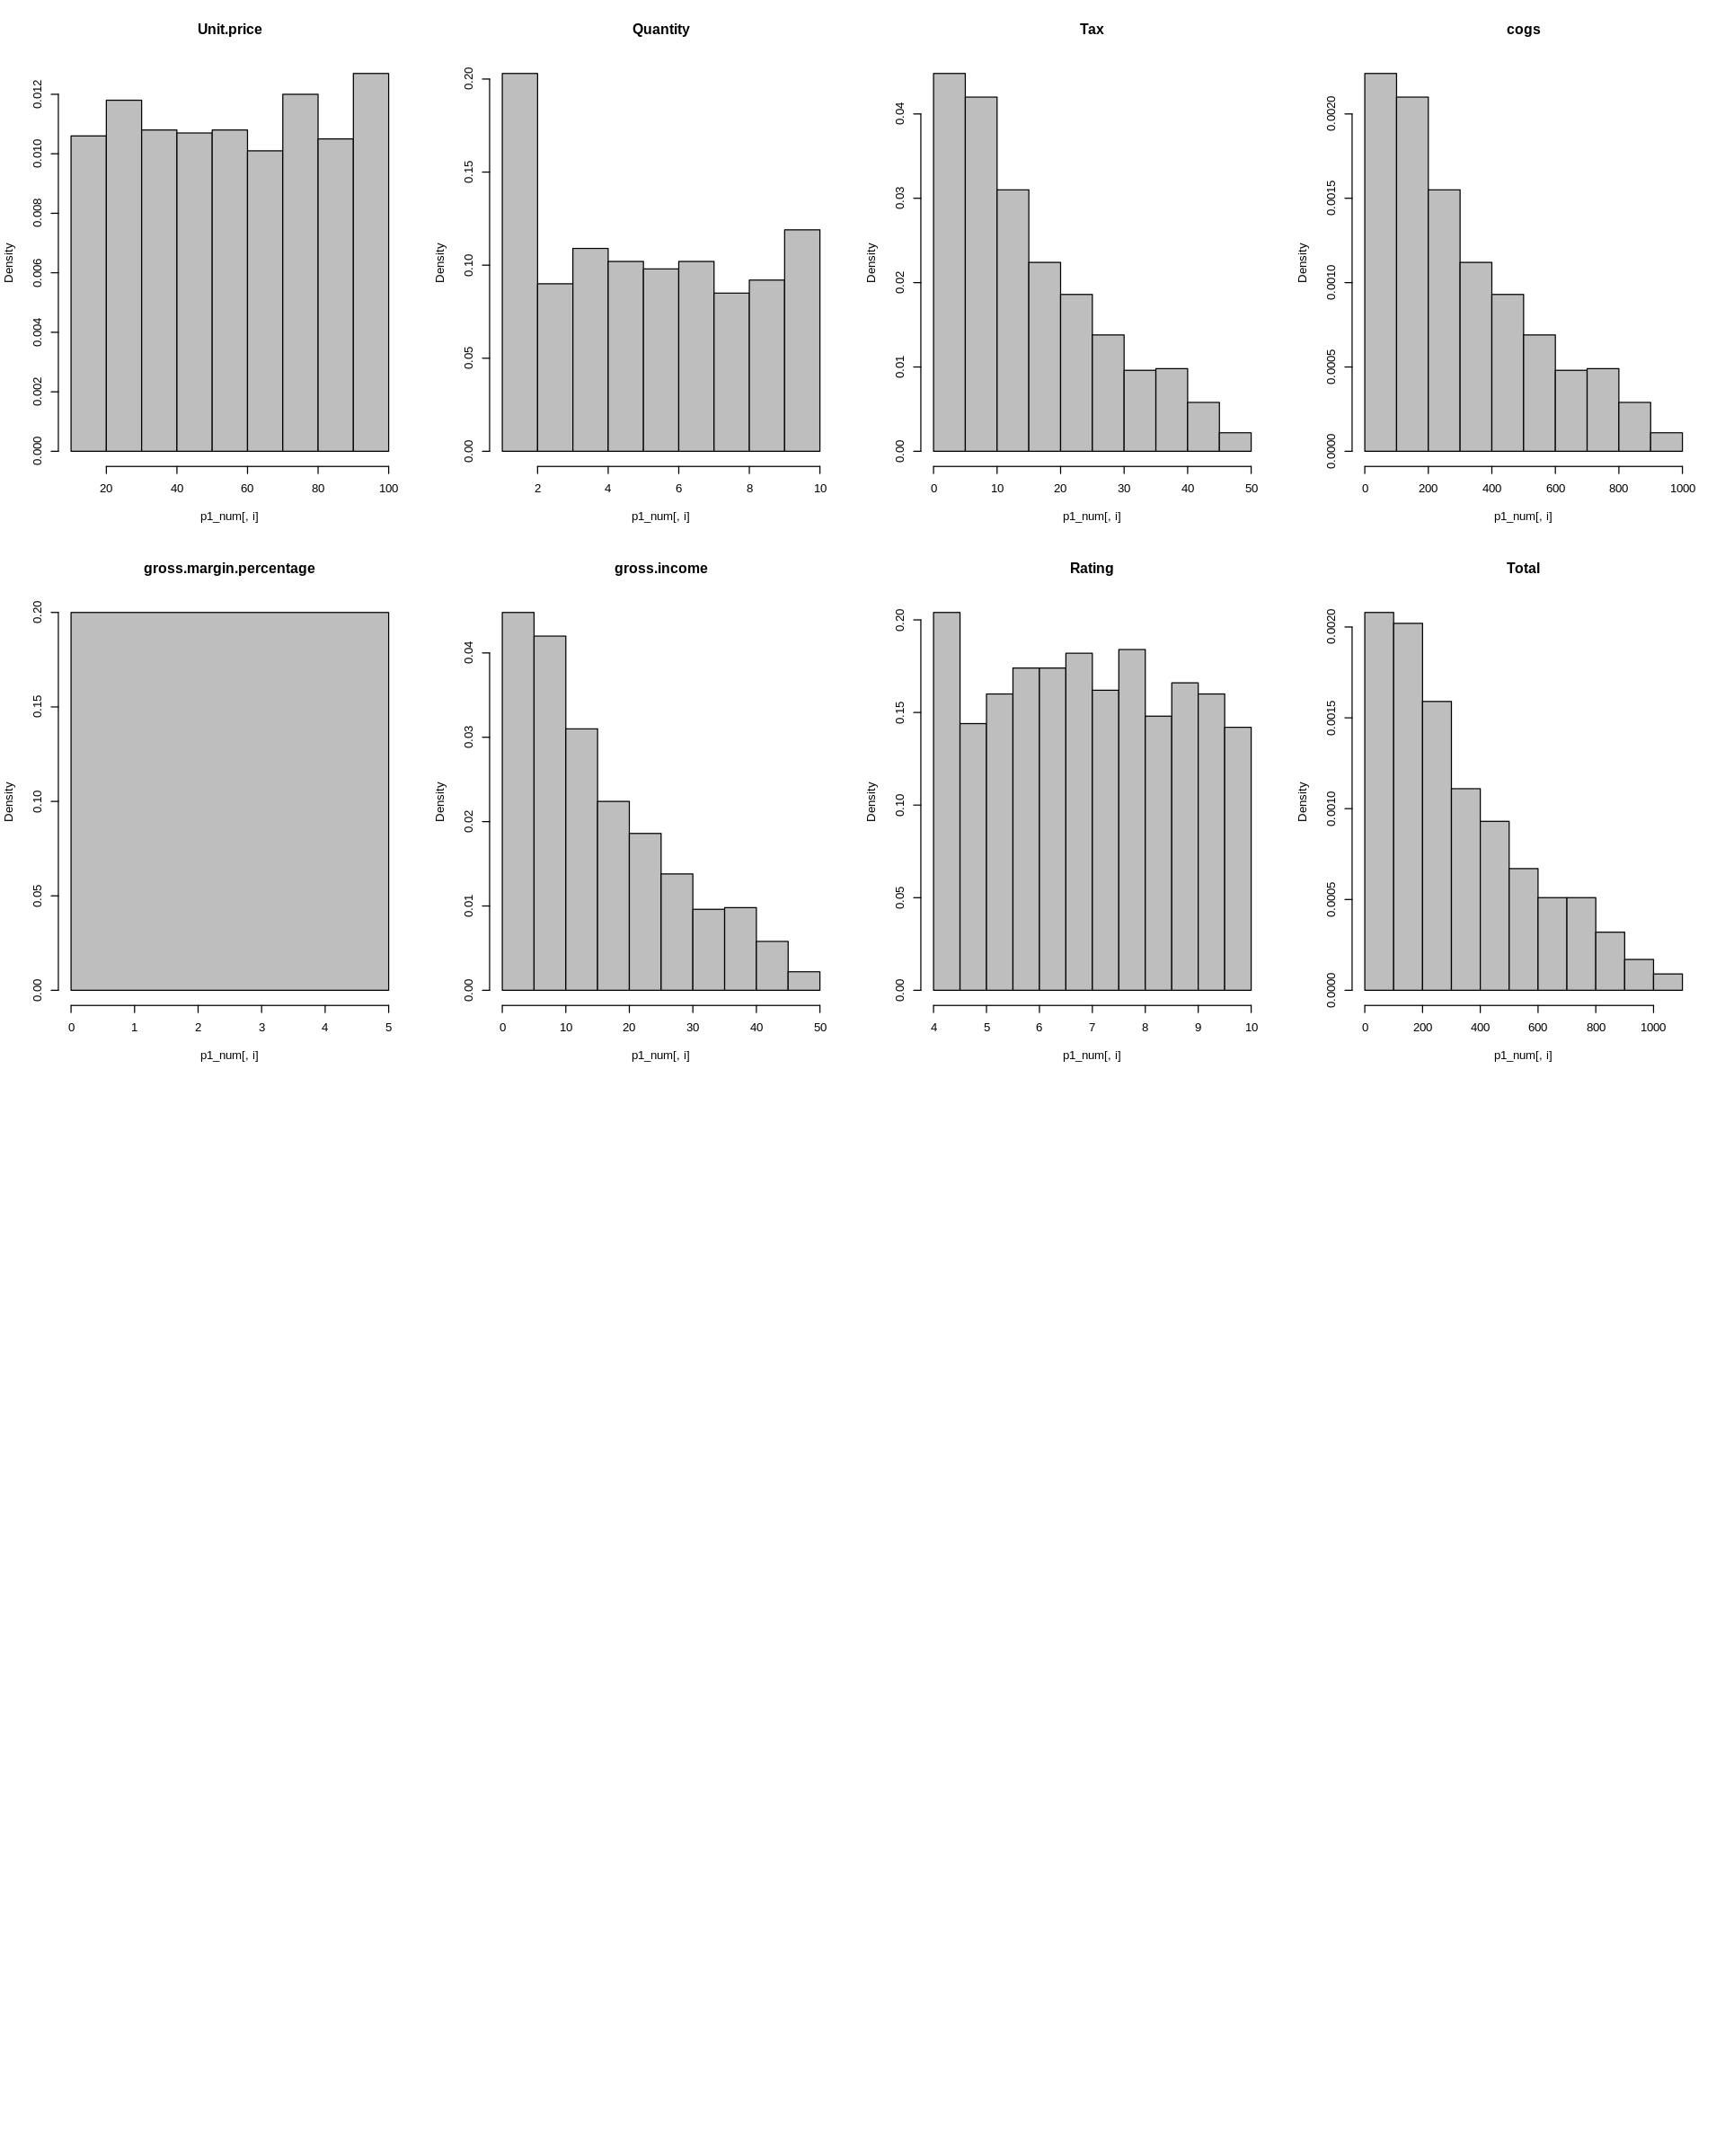

In [ ]:
# Plotting histograms to check distributions of numeric attributes

par(mfrow=c(4,4))
colnames <- dimnames(p1_num)[[2]]
for (i in 1:15) {
    hist(p1_num[,i], main=colnames[i], probability=TRUE, col="grey", border="black")
}

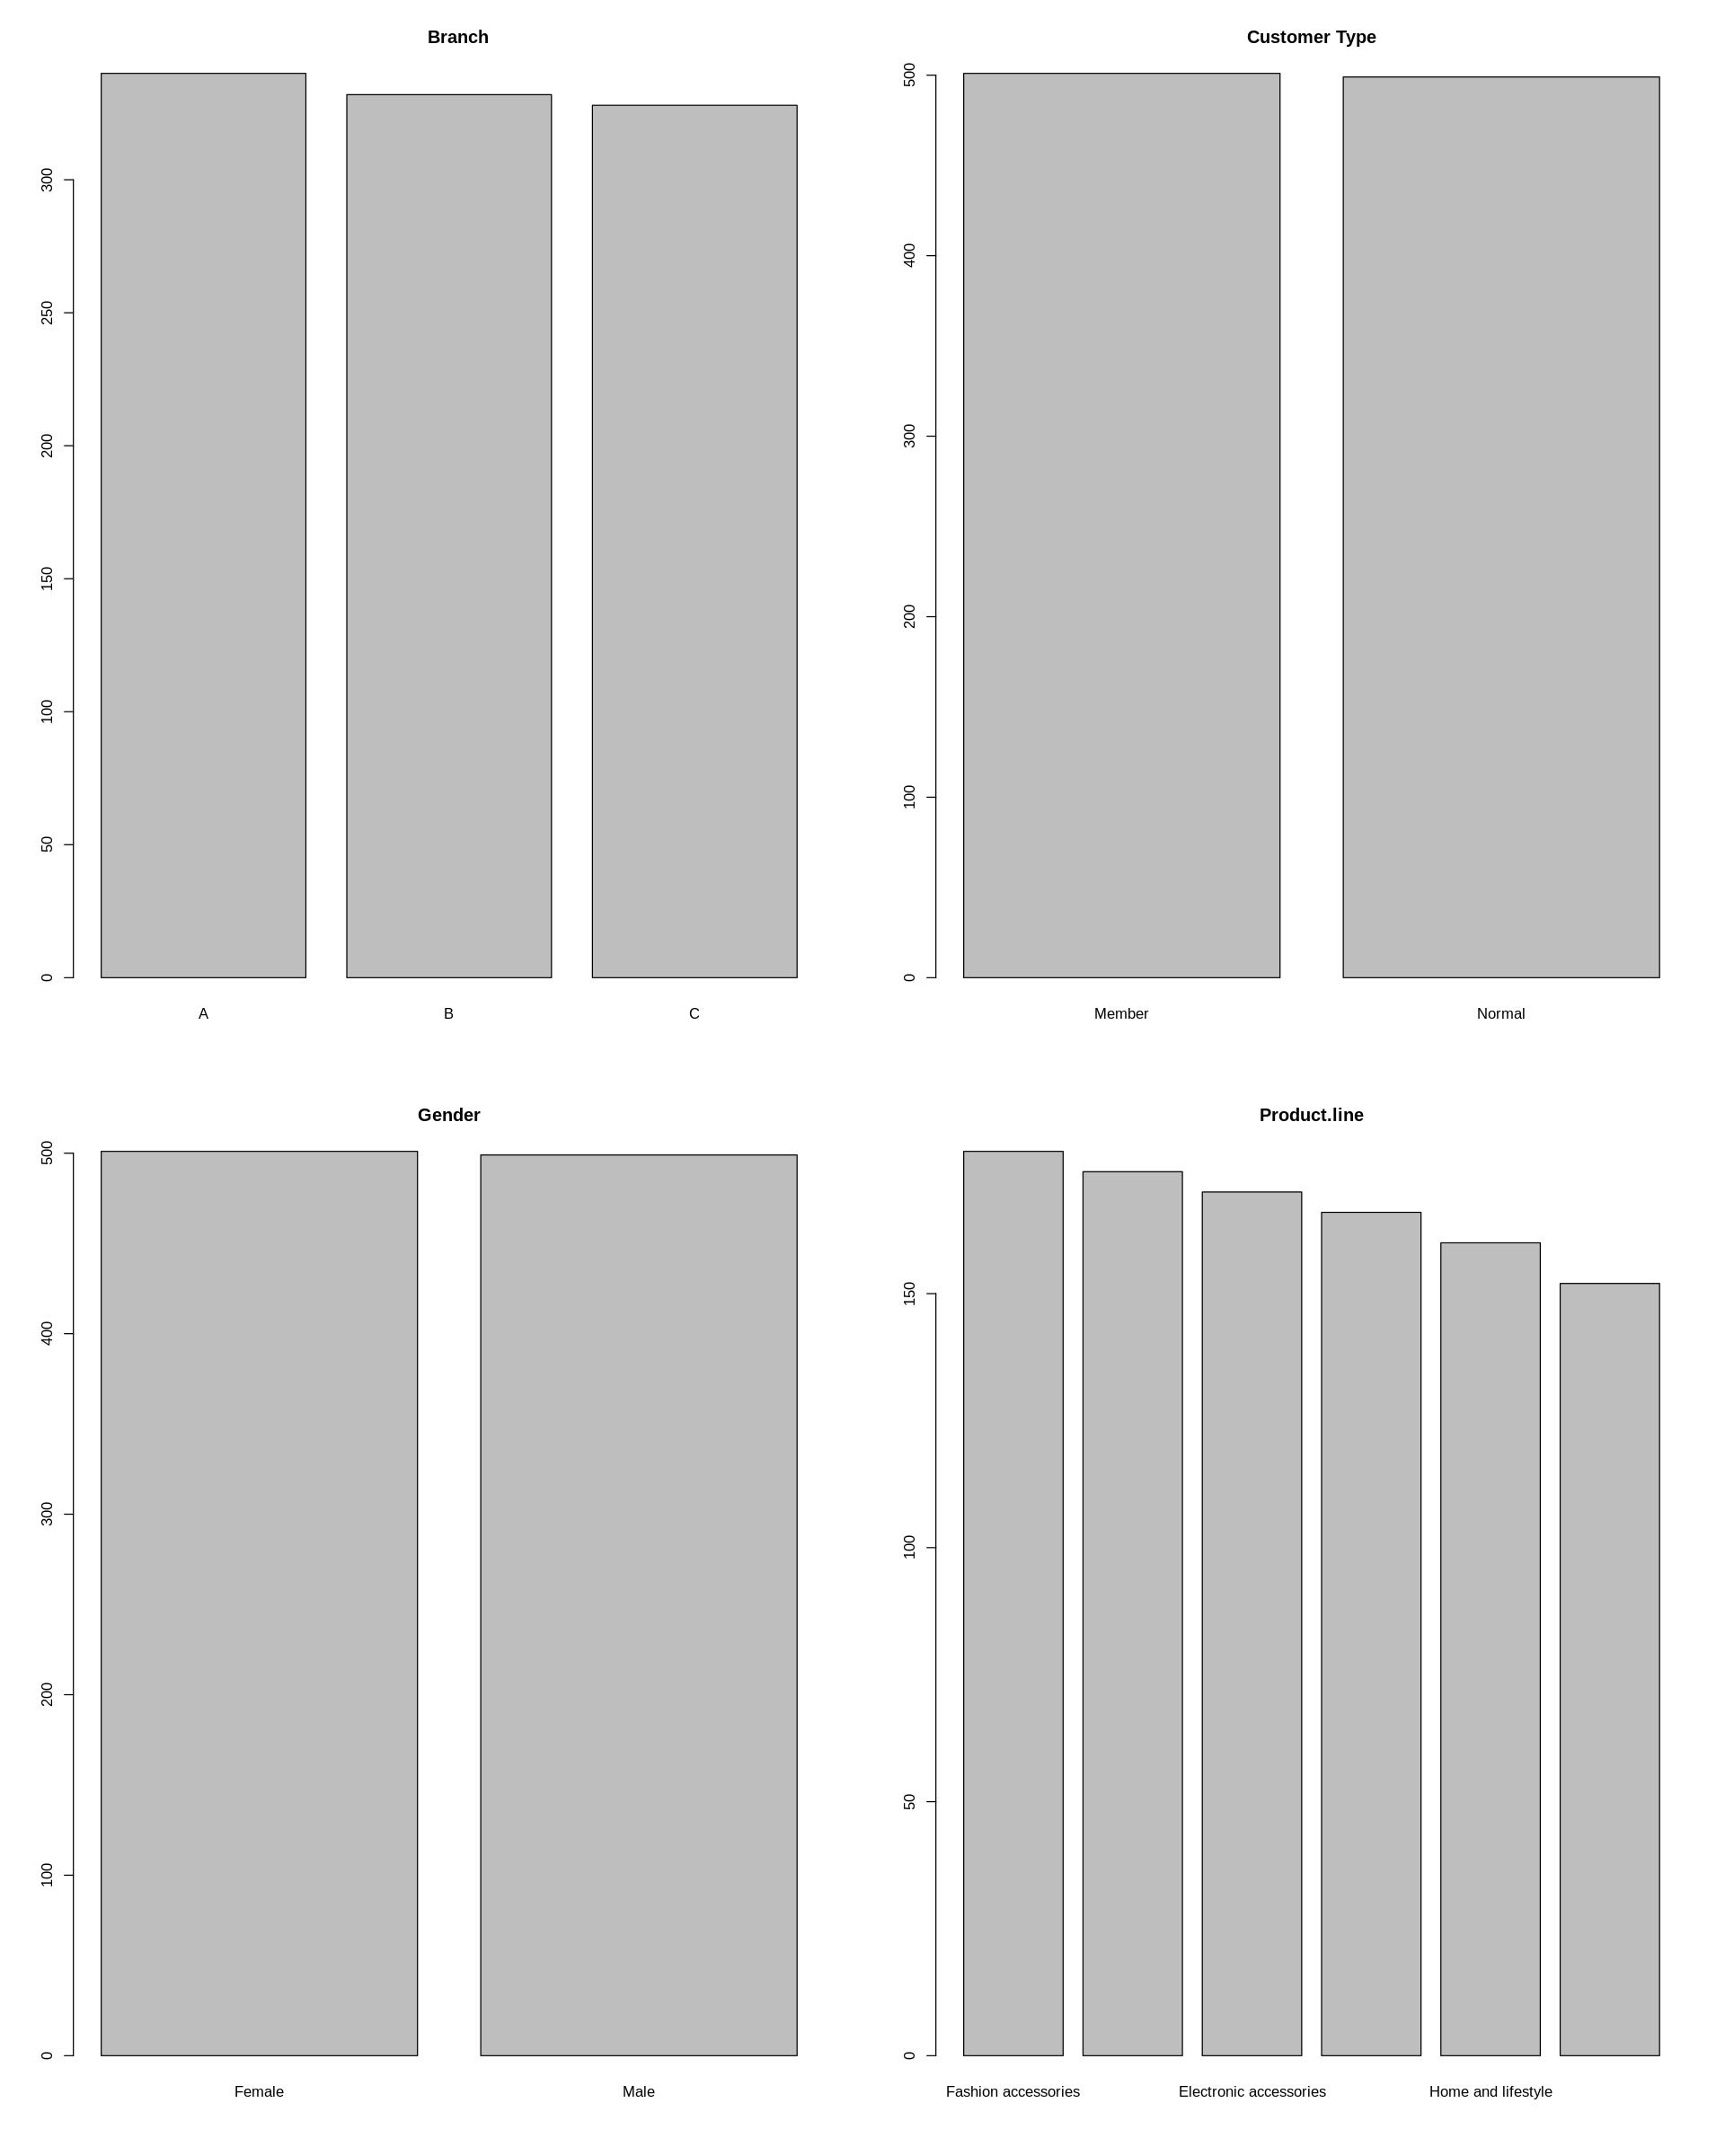

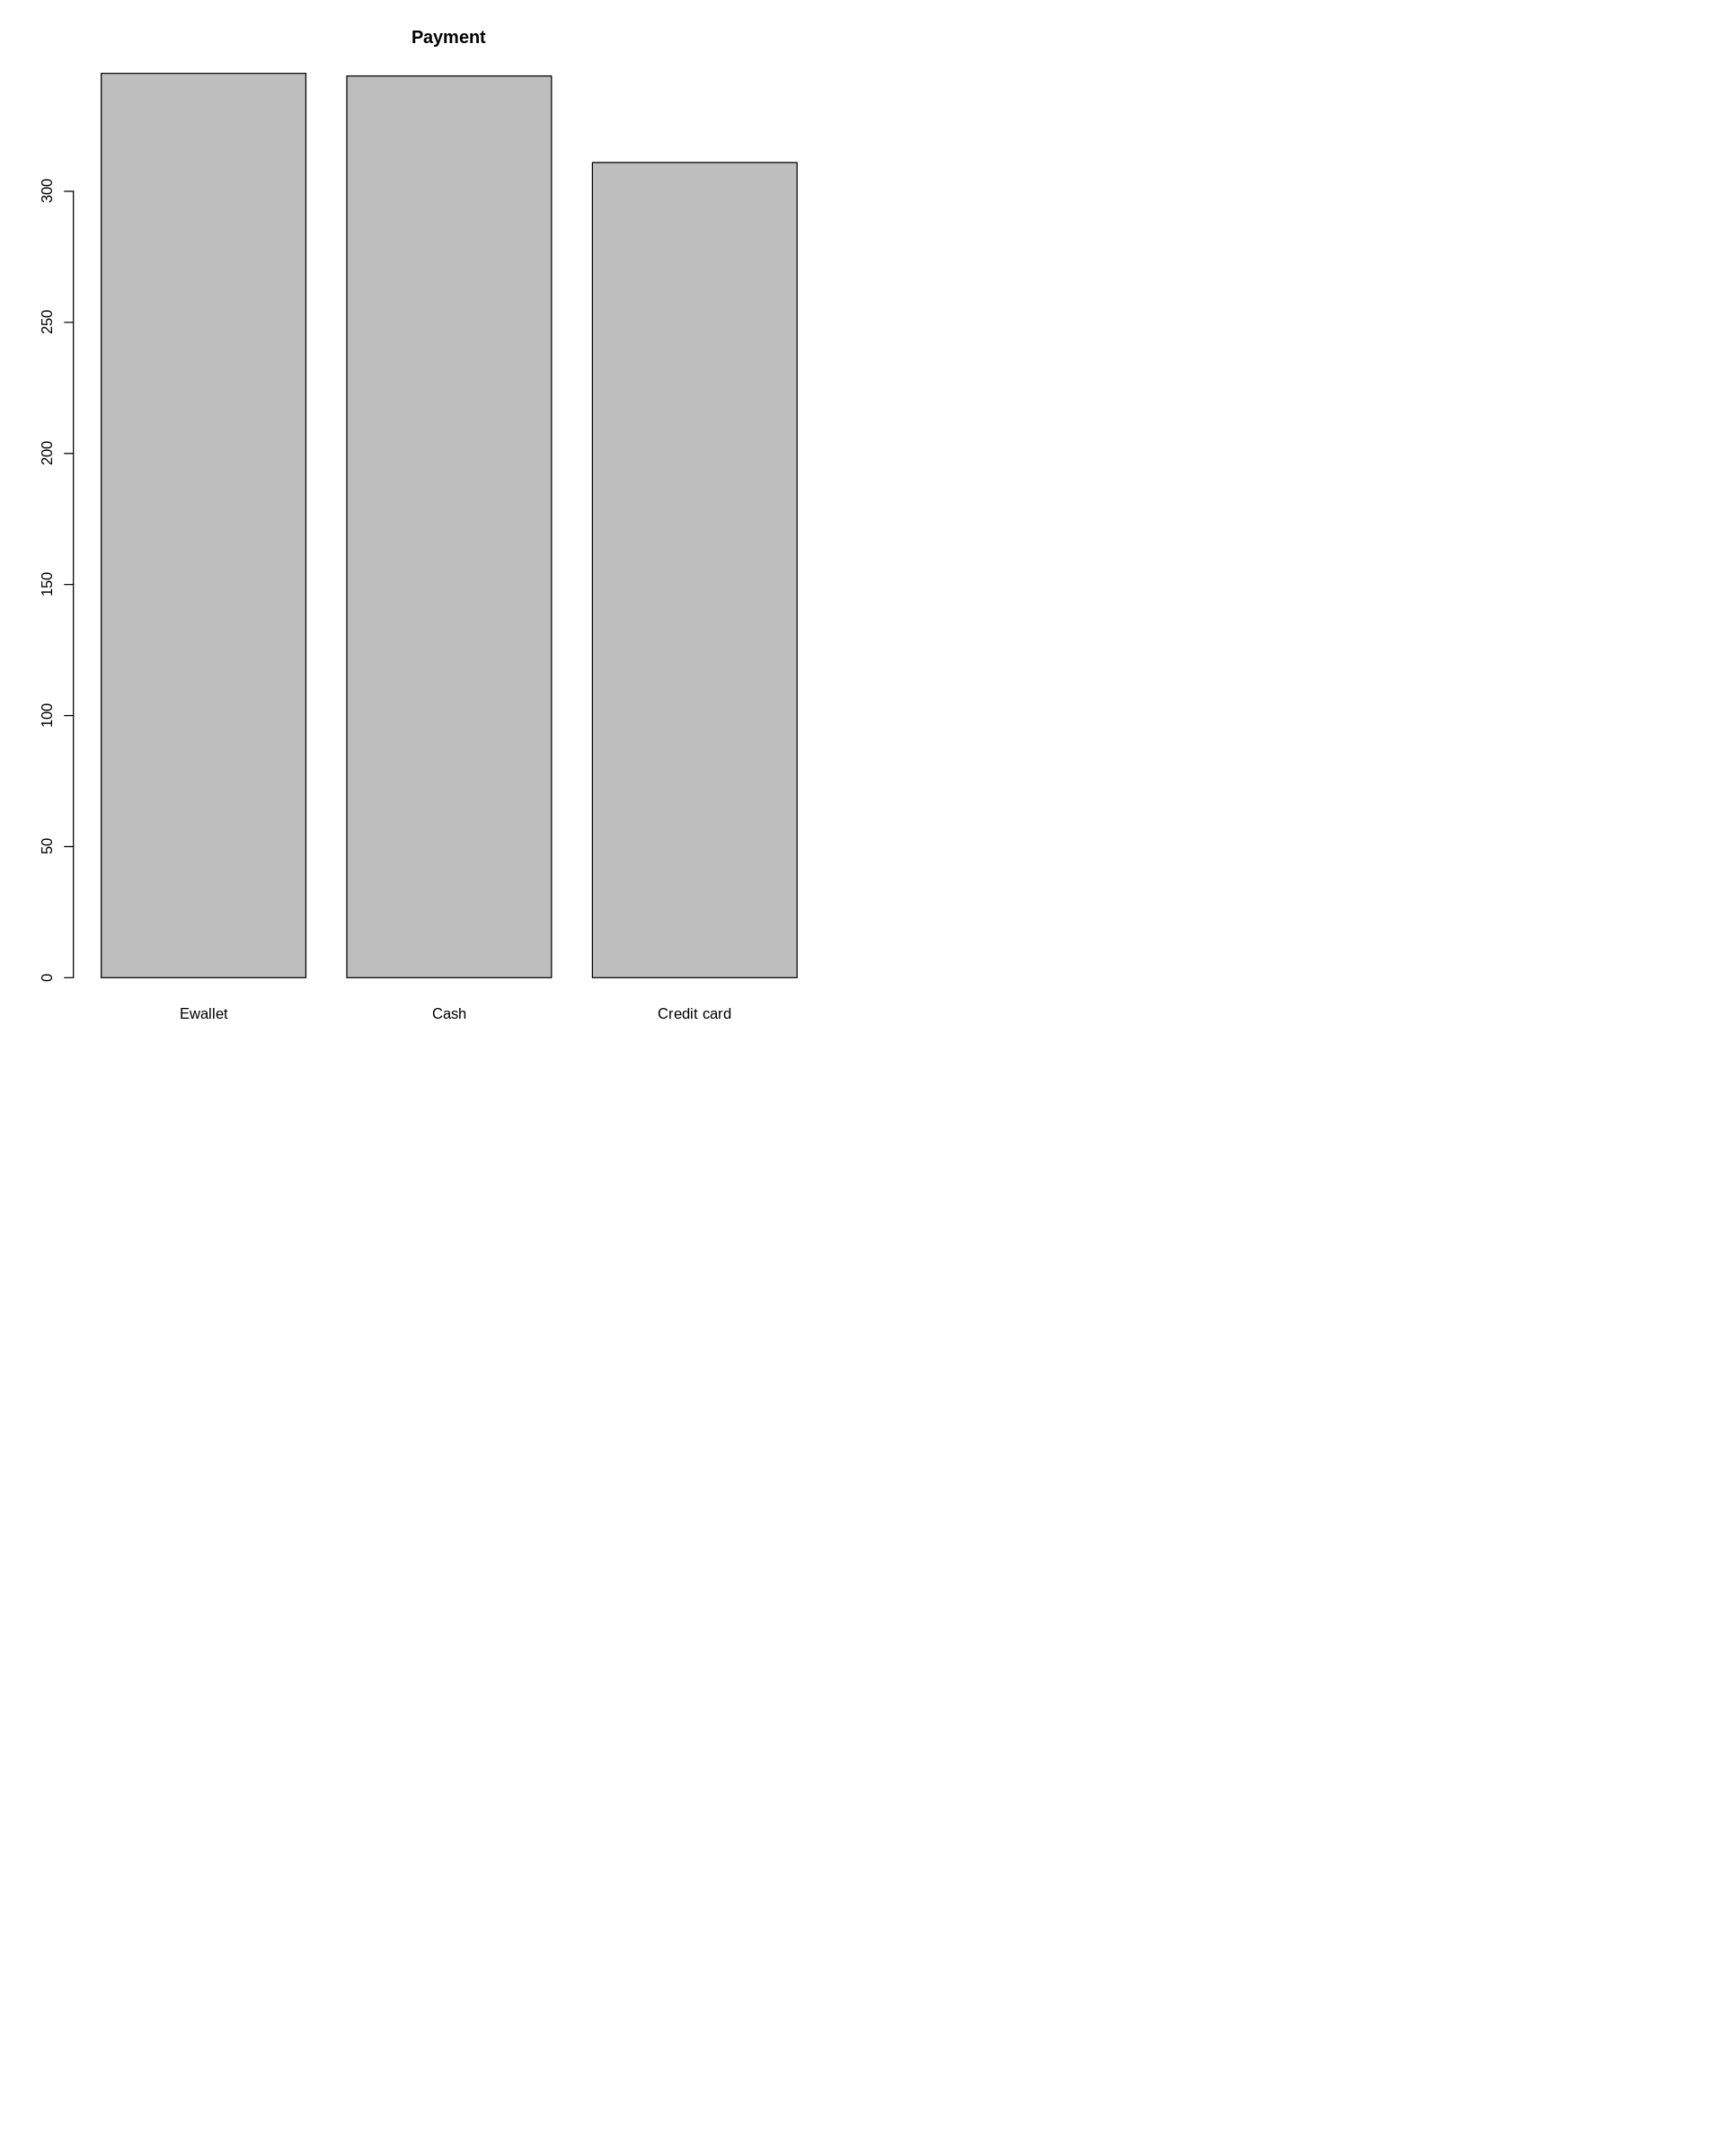

In [ ]:
# Bar plot of categorical attributes

par(mfrow=c(2,2))
colnames <- dimnames(p1)[[2]]
barplot(sort(table(p1$Branch), decreasing=T),main='	Branch	')
barplot(sort(table(p1$Customer.type), decreasing=T), main = 'Customer Type')
barplot(sort(table(p1$Gender), decreasing=T), main = 'Gender')
barplot(sort(table(p1$Product.line), decreasing=T), main = 'Product.line')
barplot(sort(table(p1$Payment), decreasing=T), main = 'Payment')

* Branch A has the largest count followed by B then C
* The customer type as an equal count between  the Member and Normal customer
* The male and female have an equal count in the Gender column
* For the payment Ewallet and cash have an equal count then crdit card with at least 300

## Bivariate

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.84 loaded

Warning message in cor(p1_num):
“the standard deviation is zero”


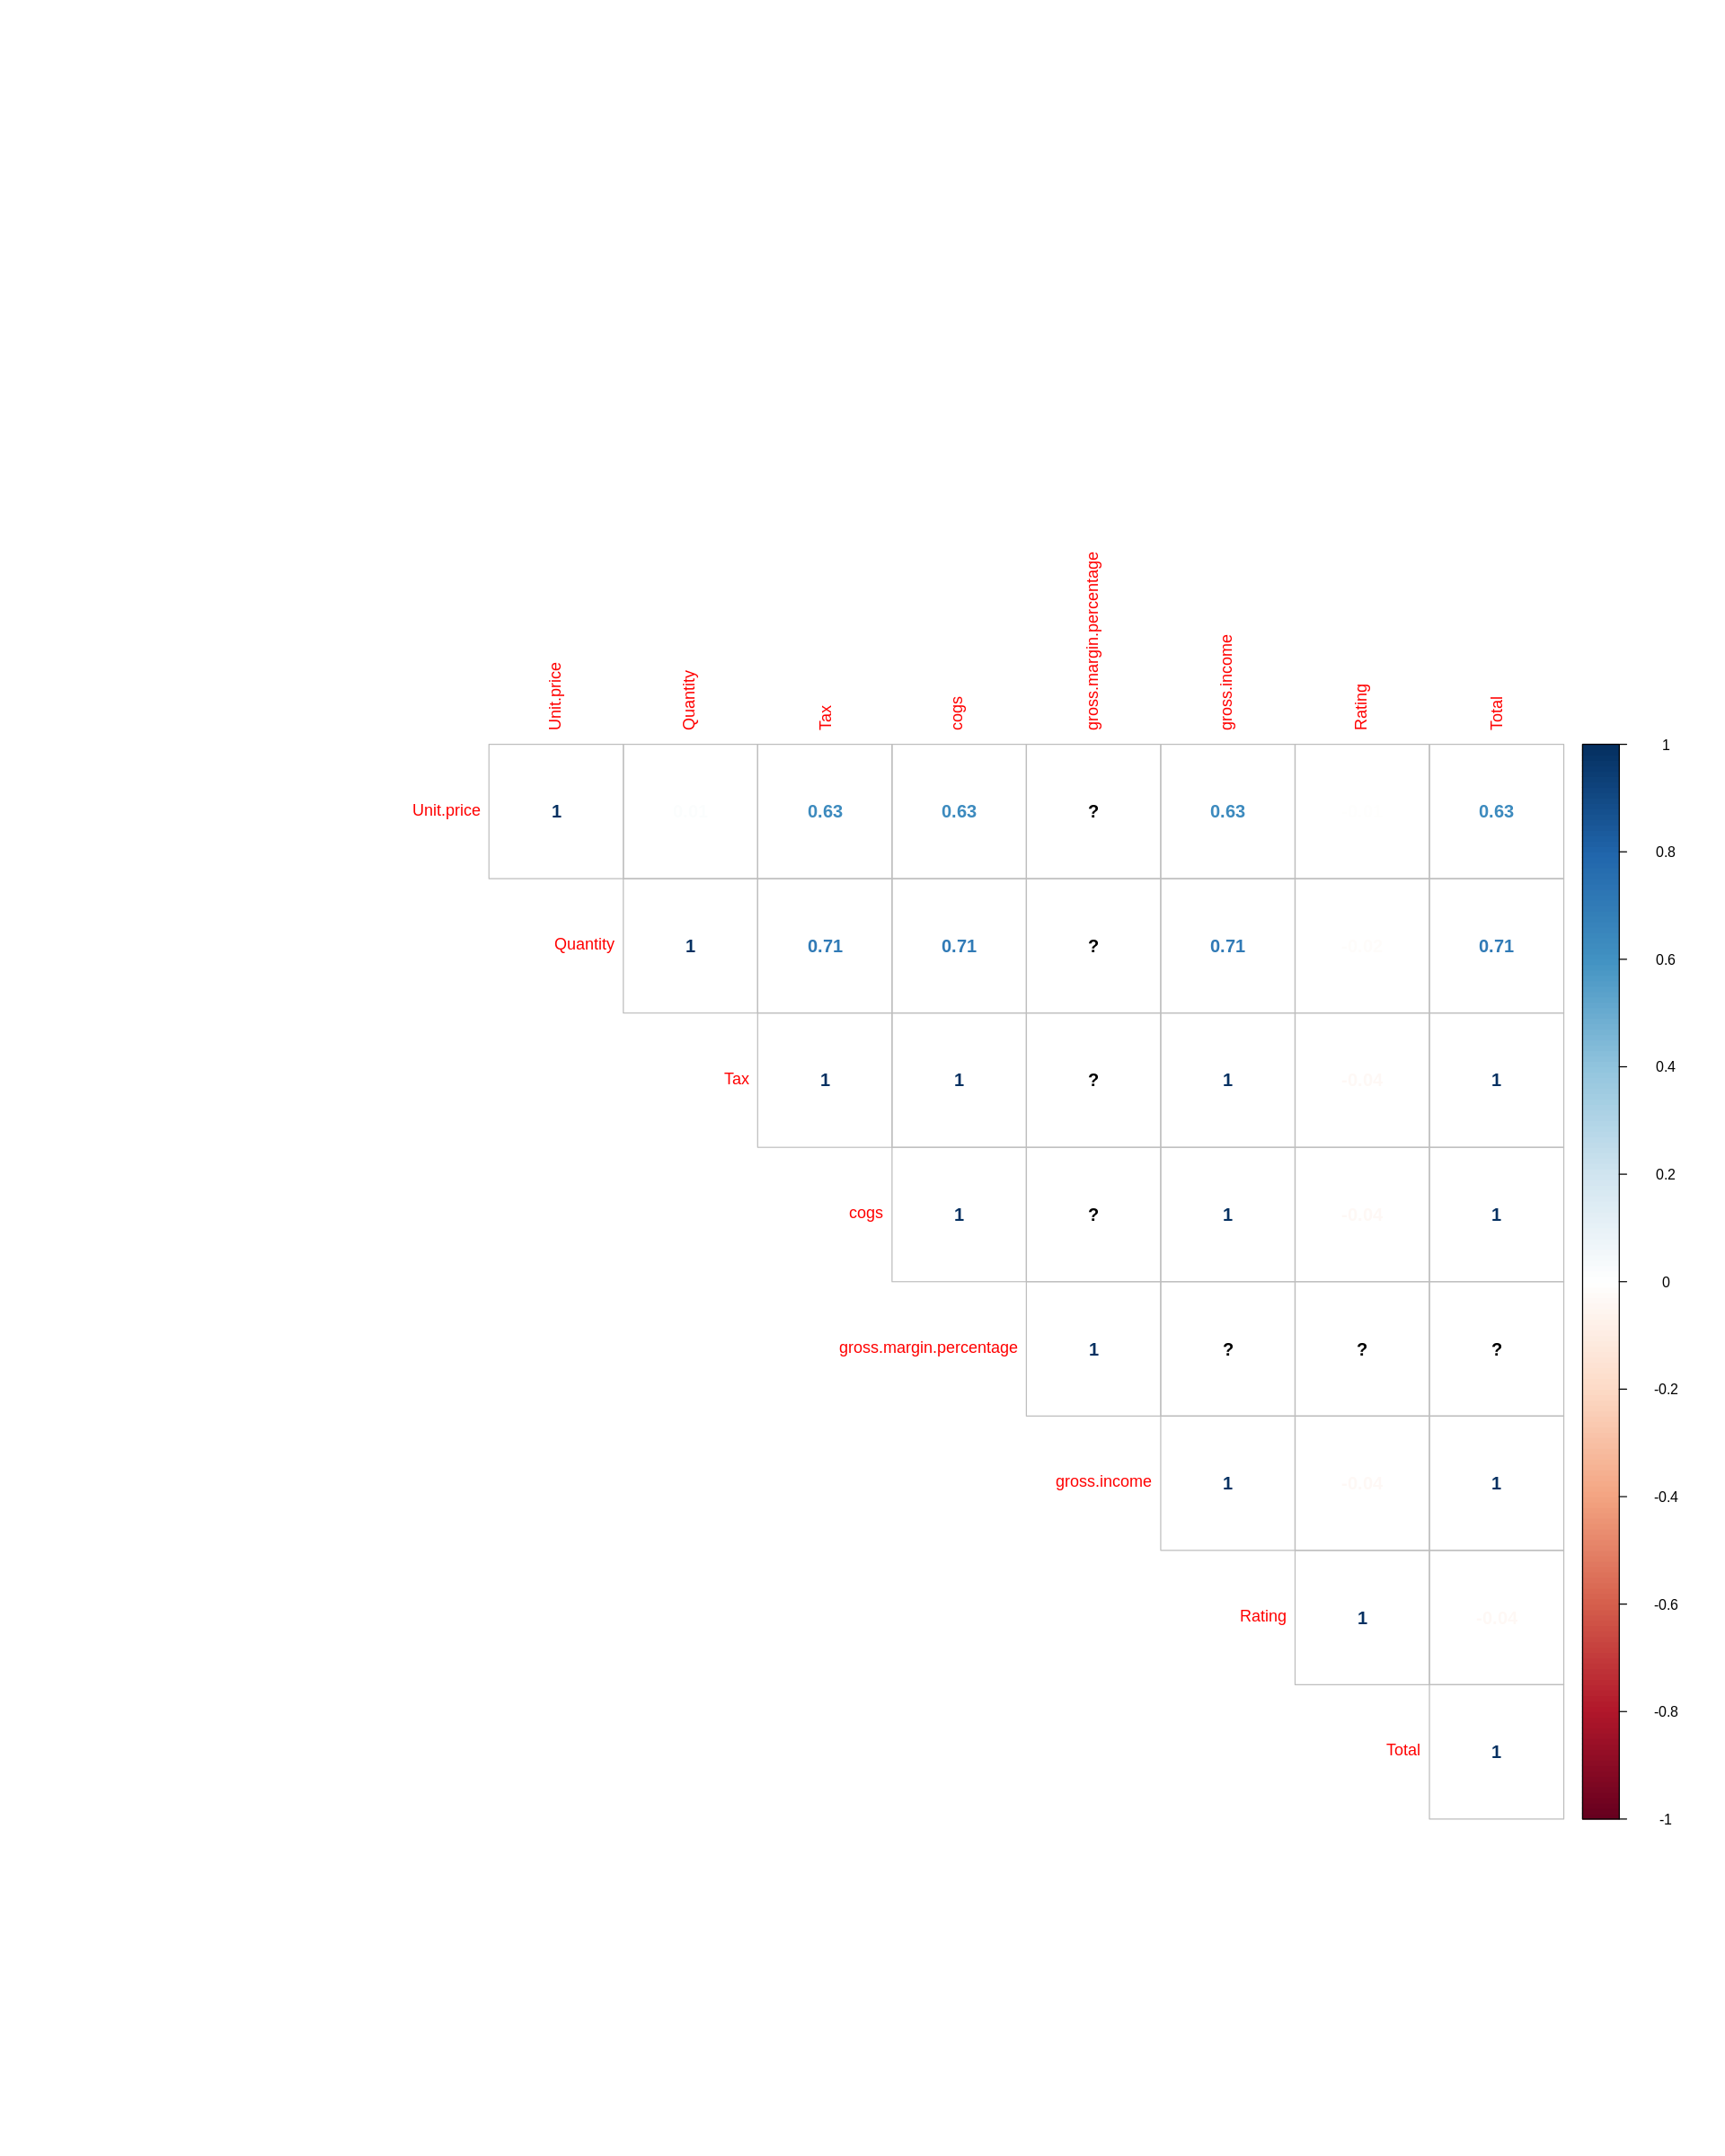

In [ ]:
# improved correlation matrix
# Checking the correlation coefficients for numeric variables

install.packages("corrplot")
library(corrplot)

corrplot(cor(p1_num), type = 'upper', method = 'number', tl.cex = 0.9)

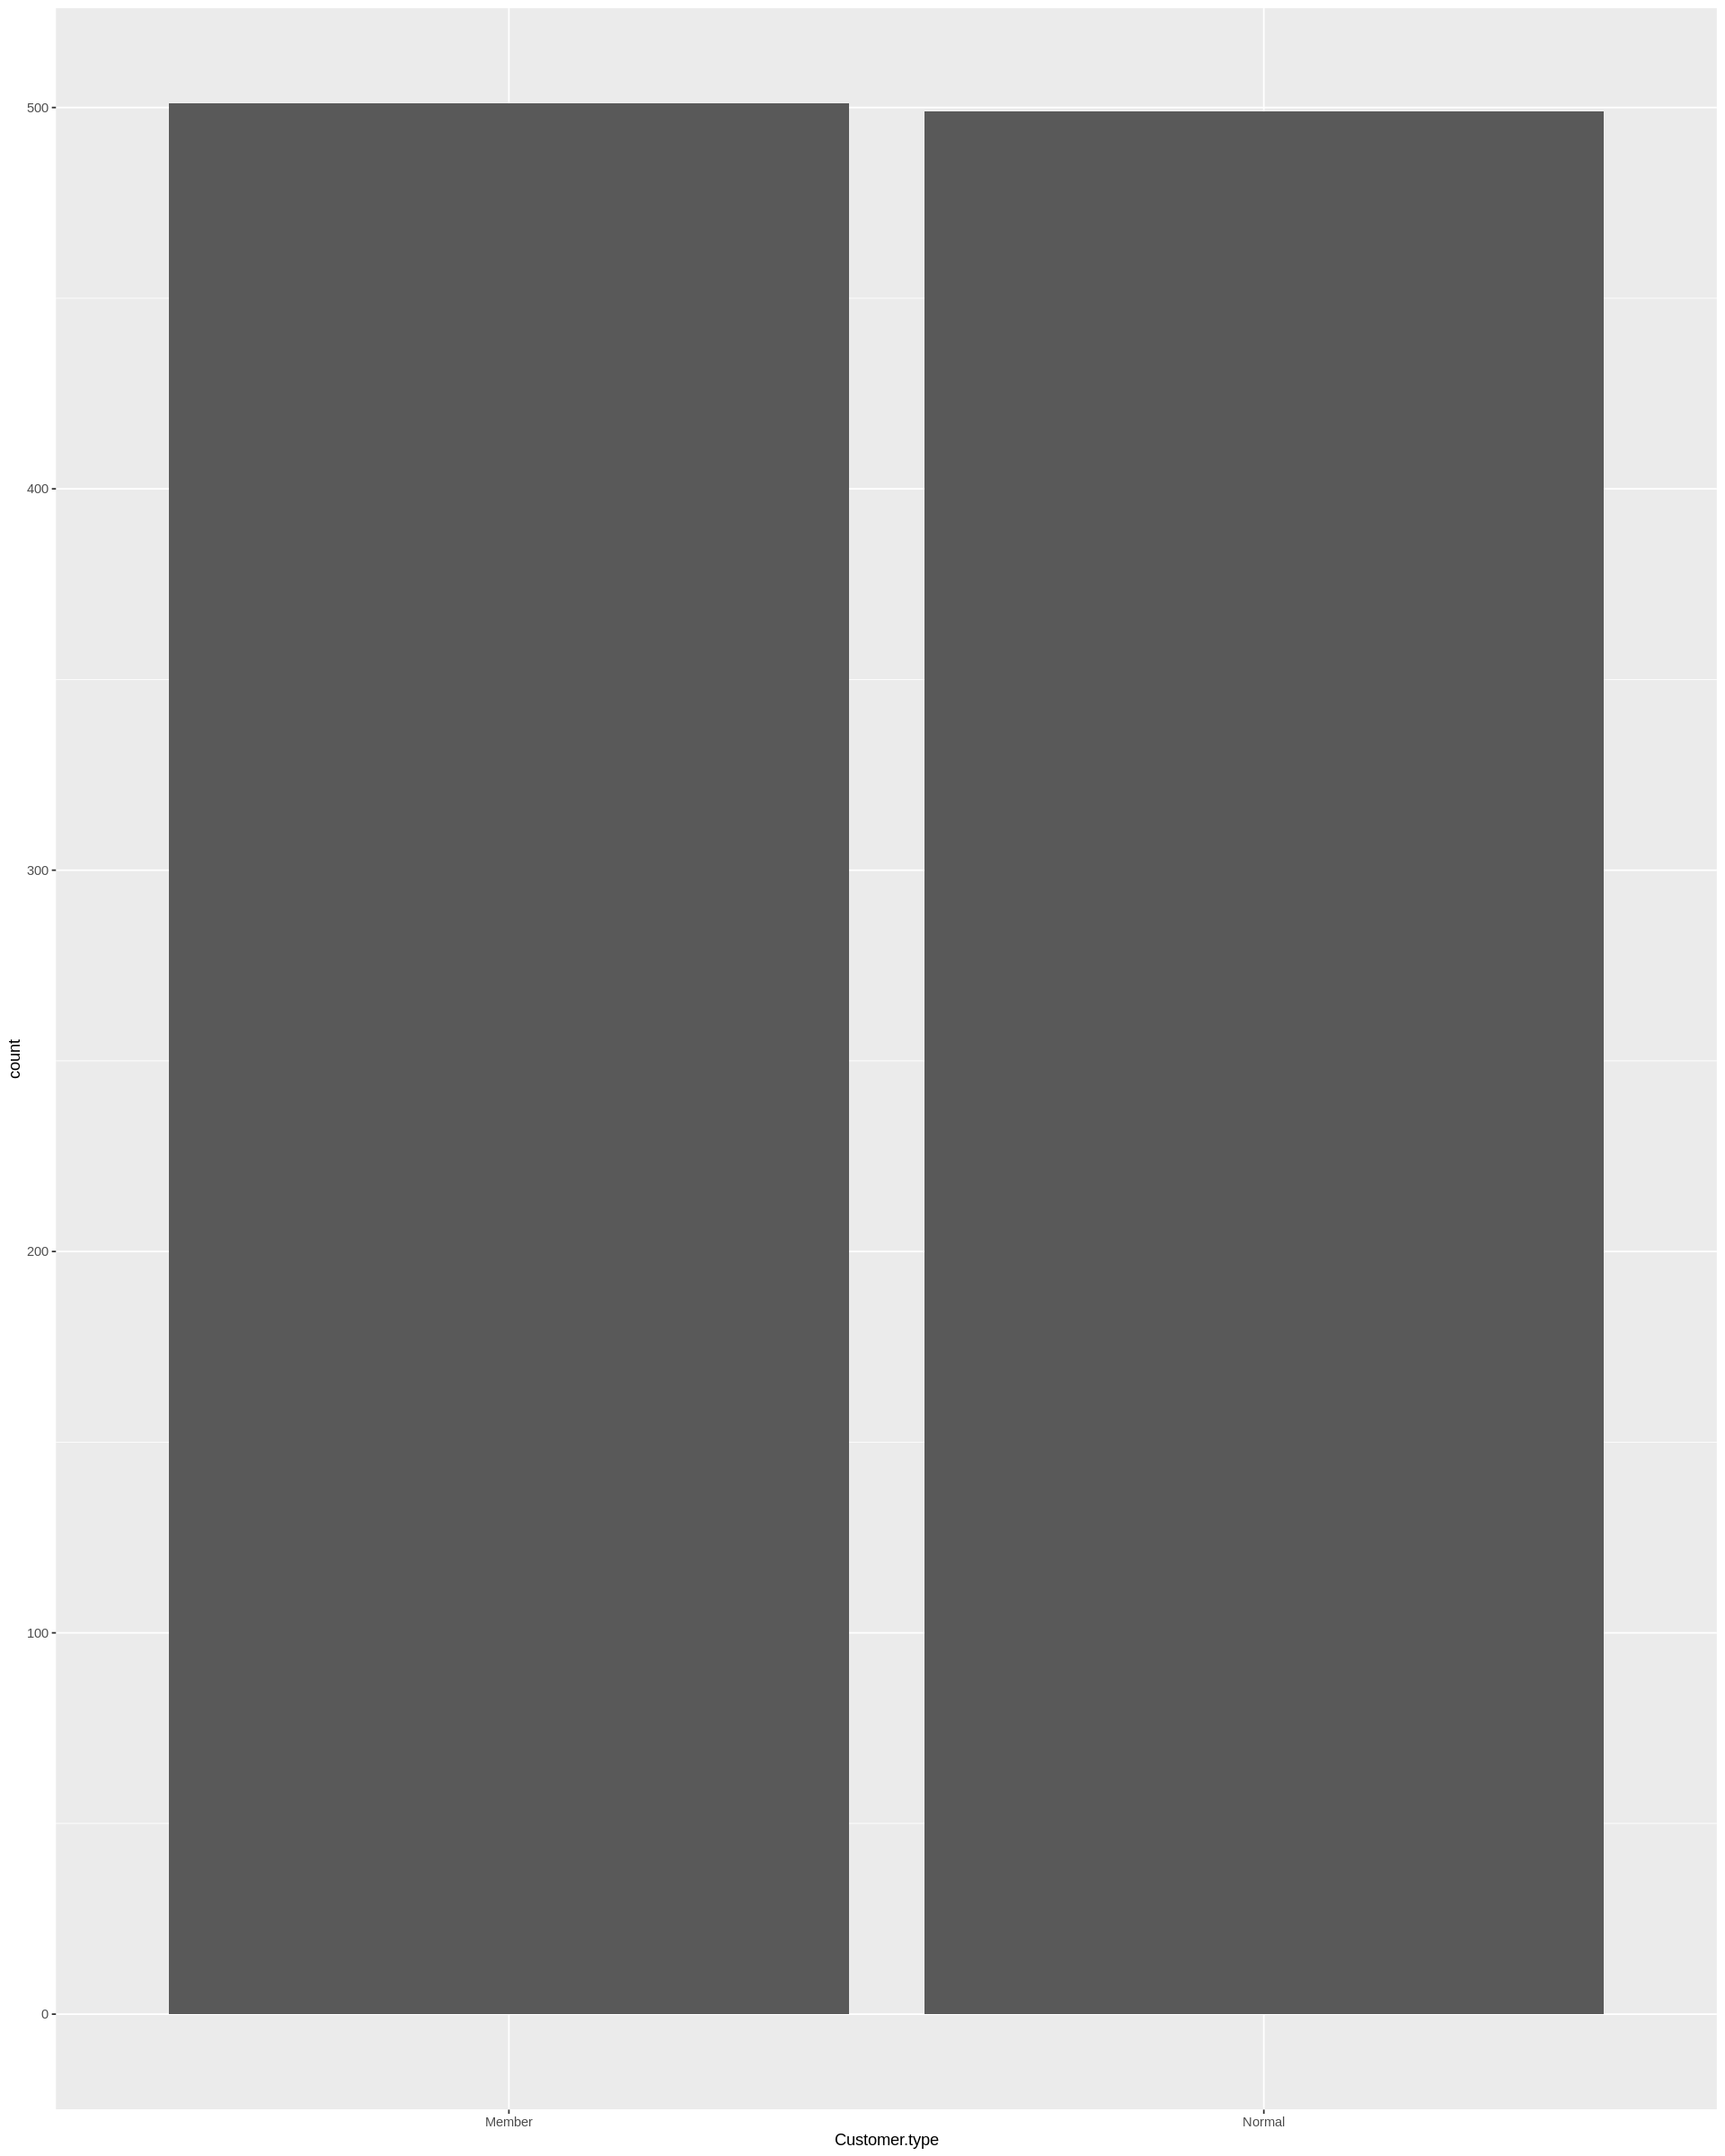

In [ ]:
# Comparing total amount  by Customer type

ggplot(data = p1) + 
  geom_bar(mapping = aes(x = Customer.type, fill = Total), position = "dodge")

* Males and females have an equal shopping count

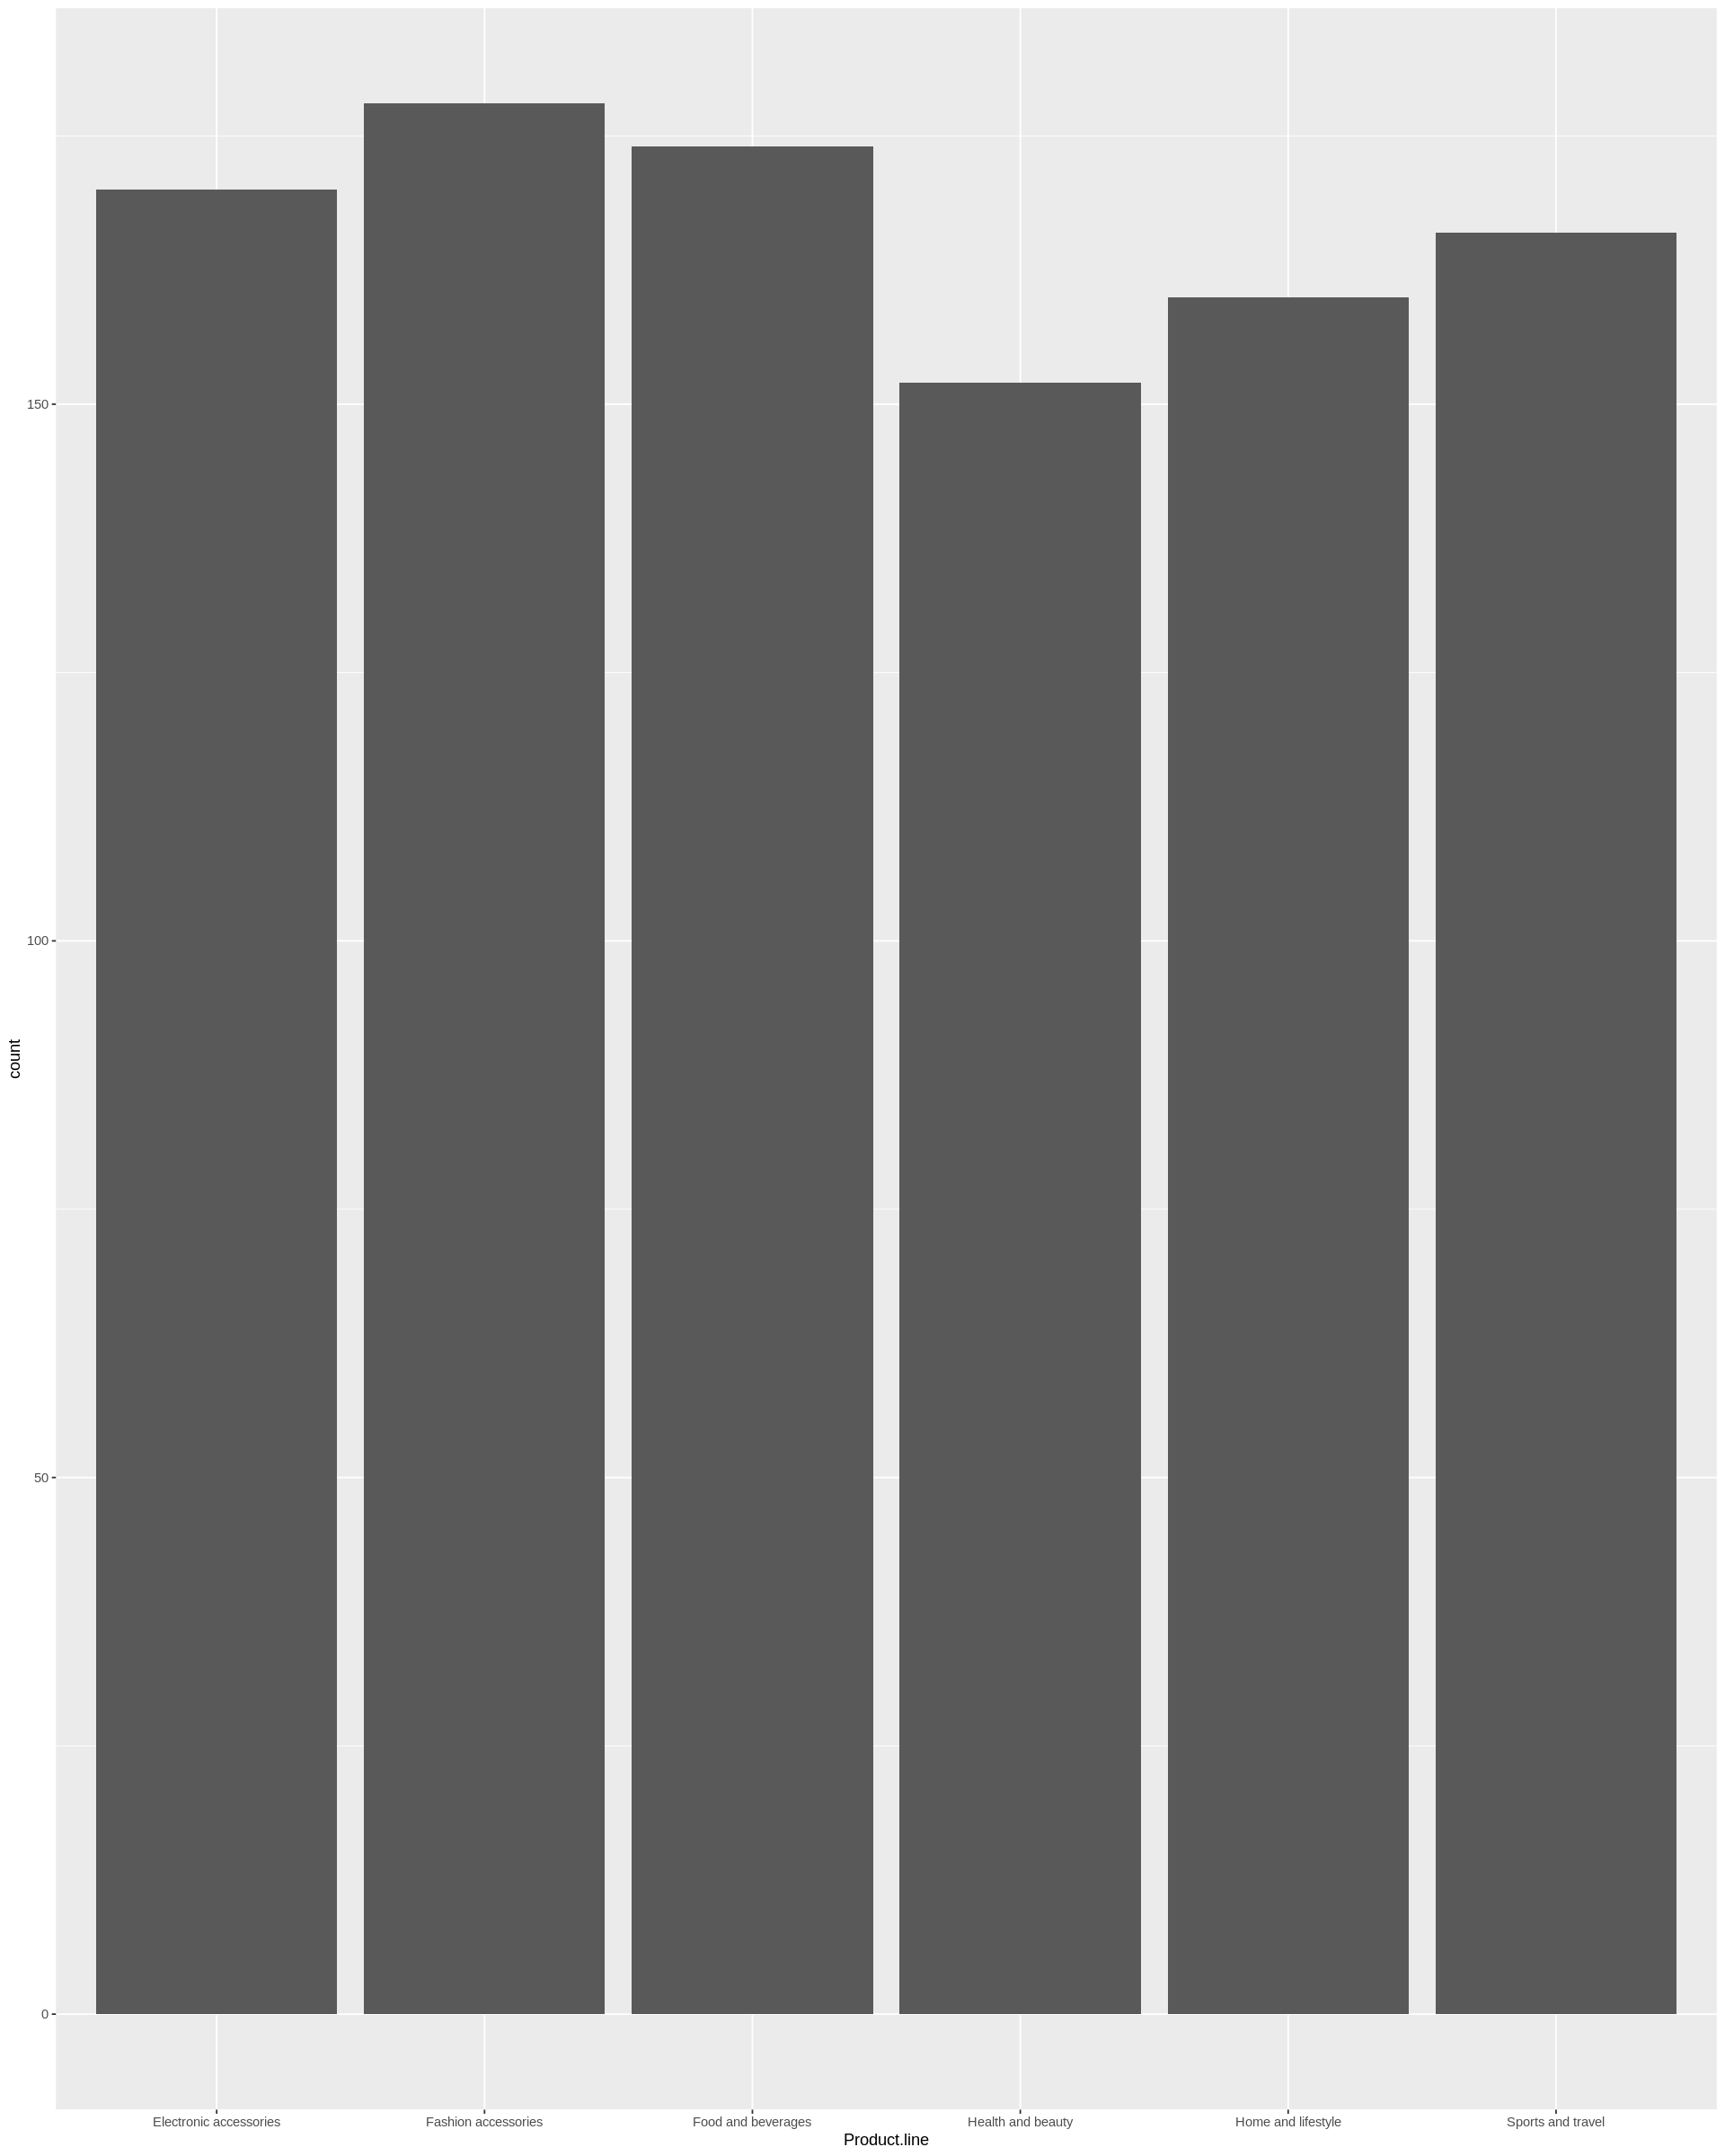

In [ ]:
# Comparing total amount  by Product line

ggplot(data = p1) + 
  geom_bar(mapping = aes(x = Product.line, fill = Total), position = "dodge")

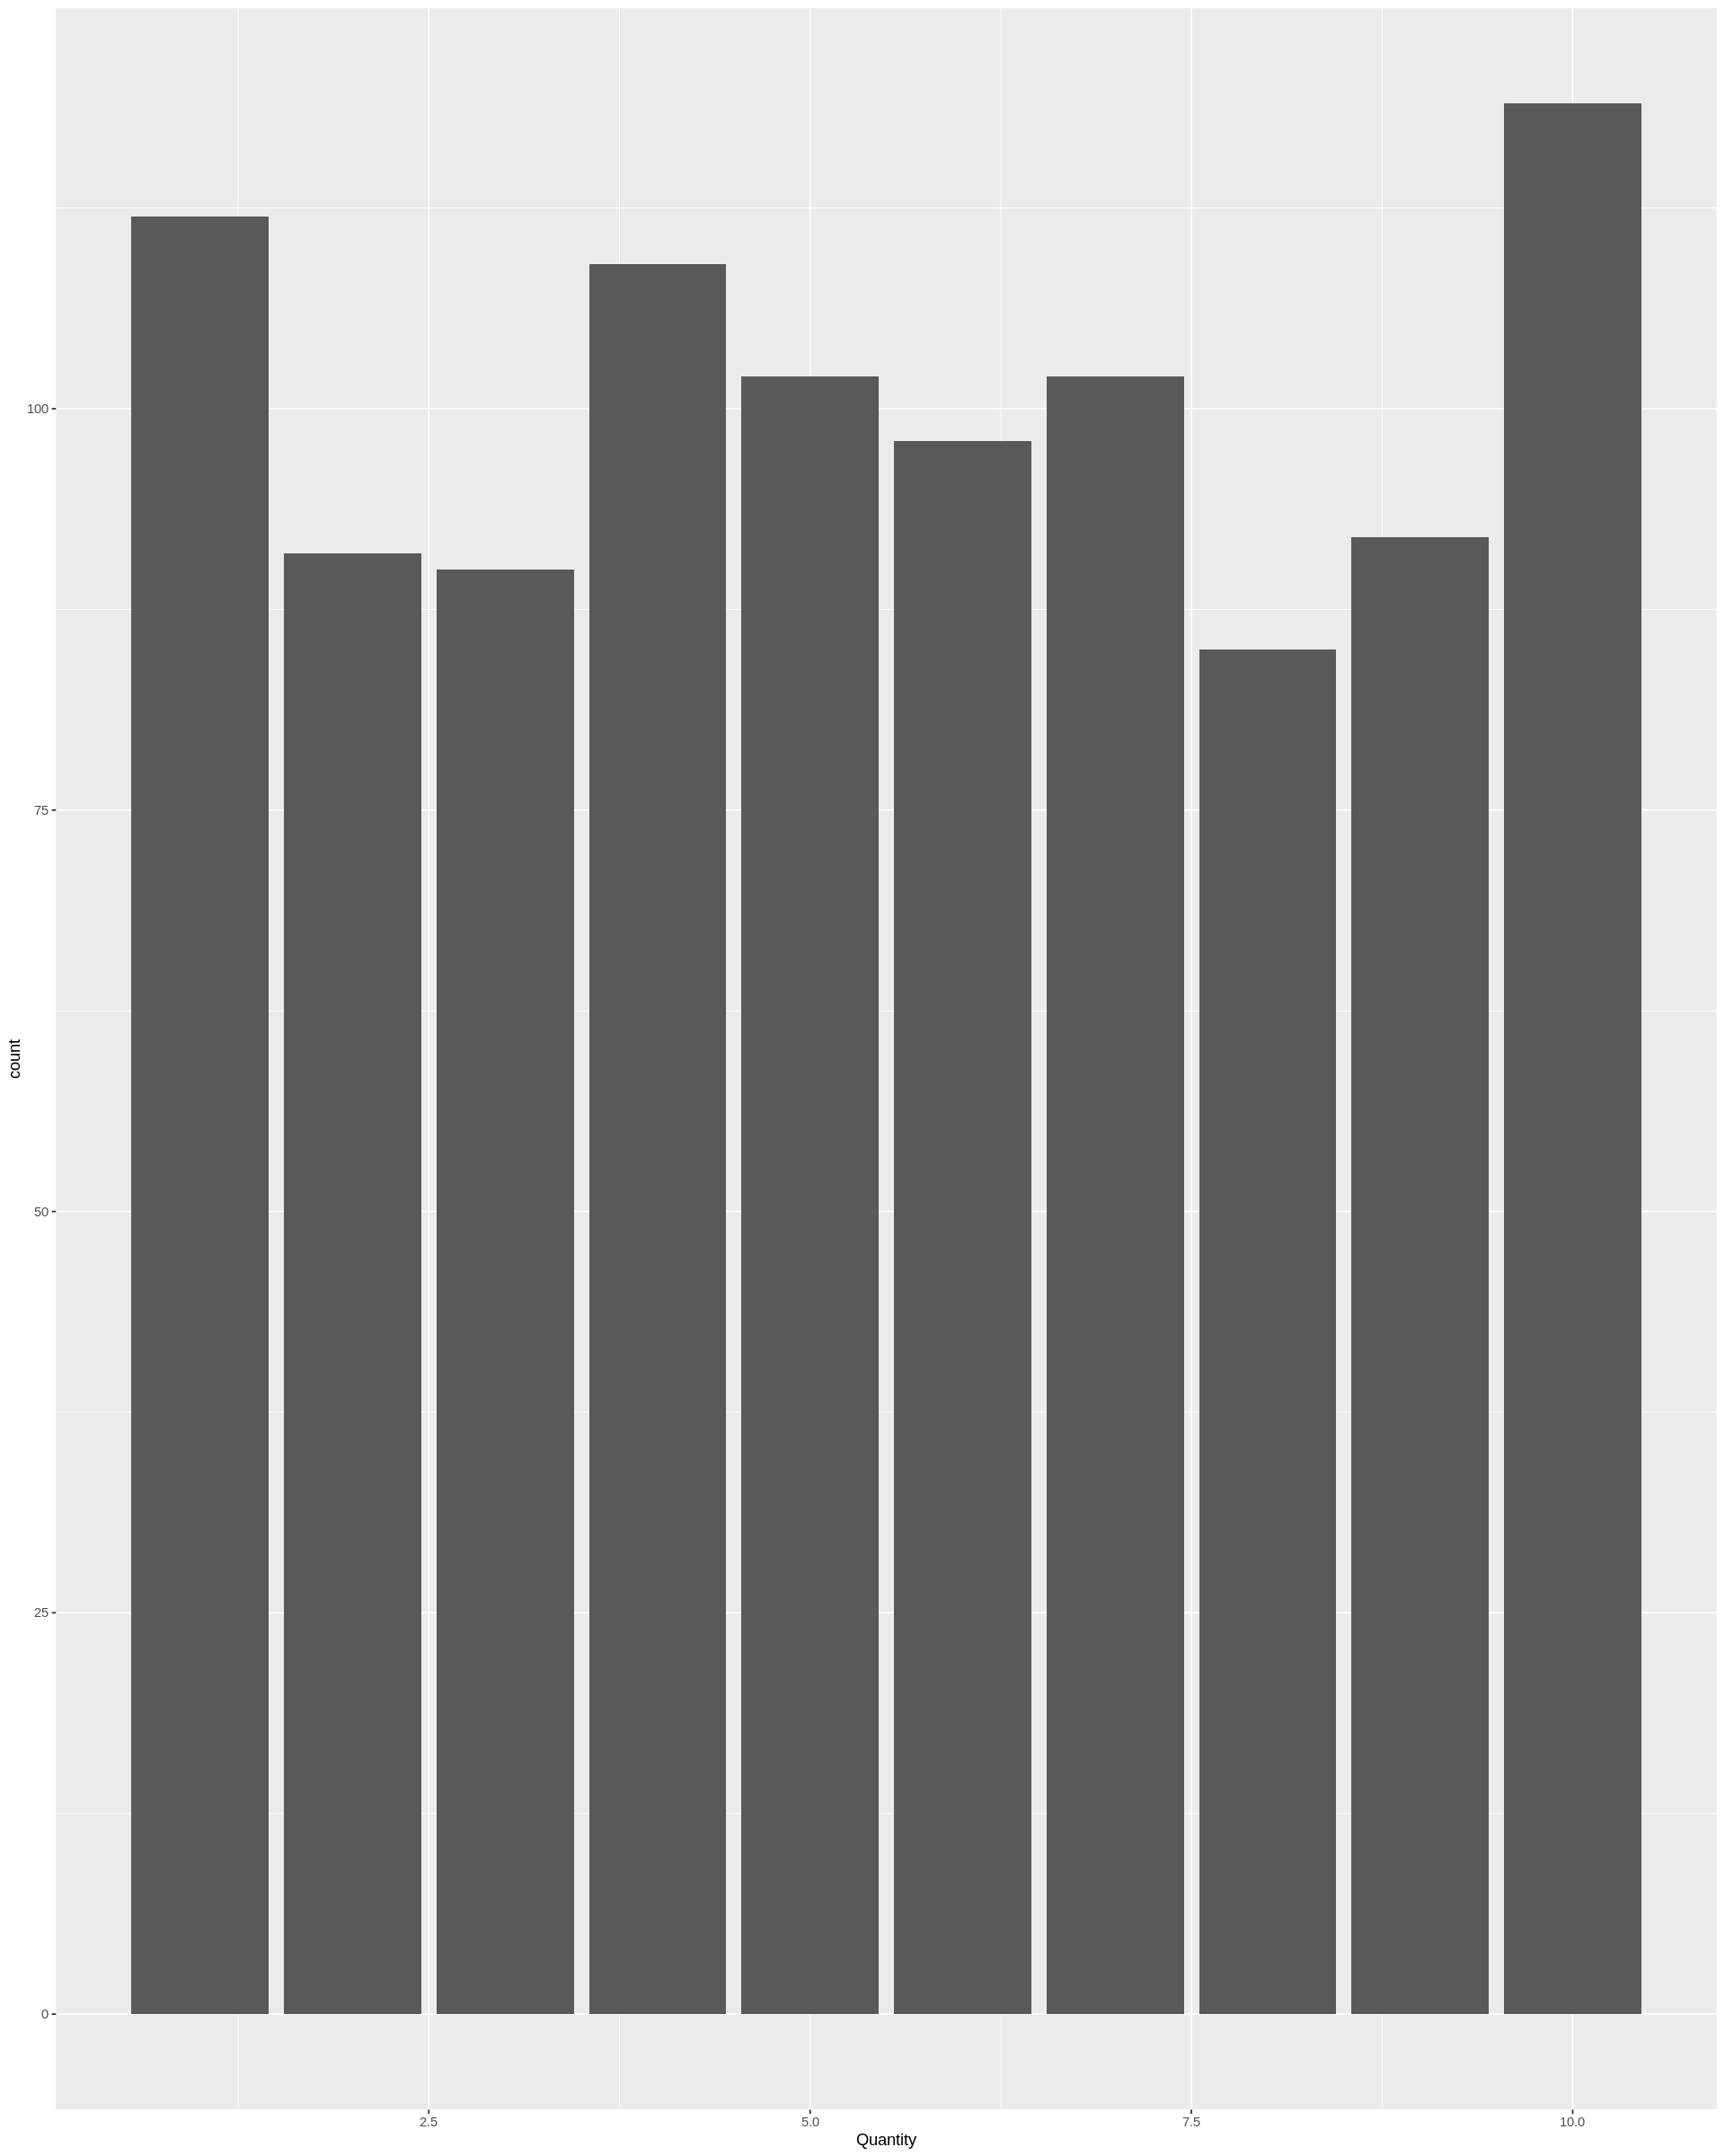

In [ ]:
# Comparing total amount  by Quantity

ggplot(data = p1) + 
  geom_bar(mapping = aes(x = Quantity, fill = Total), position = "dodge")

## Multivariate

In [ ]:
# Converting categorical attributes to numeric data type

p1$Branch <- as.integer(as.factor(p1$Branch))
p1$Customer.type <- as.integer(as.factor(p1$Customer.type))
p1$Gender <- as.integer(as.factor(p1$Gender))
p1$Product.line <- as.integer(as.factor(p1$Product.line))
p1$Payment <- as.integer(as.factor(p1$Payment))

p_1 <- p1[,-c(1,9,10)]

In [ ]:
# PReviewing the head and the structure of the new dataset
str(p_1)
head(p_1)

'data.frame':	1000 obs. of  13 variables:
 $ Branch                 : int  1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type          : int  1 2 2 1 2 2 1 2 1 1 ...
 $ Gender                 : int  1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line           : int  4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Payment                : int  3 1 2 3 3 3 3 3 2 2 ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.margin.percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ gross.income           : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Rating                 : num  9.1 9.6 7.4 8.4 5.3 4.1 5.8 8 7.2 5.9 ...
 $ Total                  : num  549 80.2 340.5 489 634.4 ...


Branch Customer.type Gender Product.line Unit.price Quantity Tax     Payment
1 1      1             1      4            74.69      7        26.1415 3      
2 3      2             1      1            15.28      5         3.8200 1      
3 1      2             2      5            46.33      7        16.2155 2      
4 1      1             2      4            58.22      8        23.2880 3      
5 1      2             2      6            86.31      7        30.2085 3      
6 3      2             2      1            85.39      7        29.8865 3      
  cogs   gross.margin.percentage gross.income Rating Total   
1 522.83 4.761905                26.1415      9.1    548.9715
2  76.40 4.761905                 3.8200      9.6     80.2200
3 324.31 4.761905                16.2155      7.4    340.5255
4 465.76 4.761905                23.2880      8.4    489.0480
5 604.17 4.761905                30.2085      5.3    634.3785
6 597.73 4.761905                29.8865      4.1    627.6165

In [ ]:
# Because you can't divide by the standard deviation if it's infinity. 
# To identify the zero-variance column, we can use which as follows to get the variable name.

which(apply(p_1, 2, var)==0)
# The zero variance column is:
# gross.margin.percentage
# 10

gross.margin.percentage 
                     10

In [ ]:
# To remove zero variance columns from the dataset, 
# you can use the same apply expression, setting variance not equal to zero

p_2 <- p_1[ , which(apply(p_1, 2, var) != 0)]
head(p_2)

Branch Customer.type Gender Product.line Unit.price Quantity Tax     Payment
1 1      1             1      4            74.69      7        26.1415 3      
2 3      2             1      1            15.28      5         3.8200 1      
3 1      2             2      5            46.33      7        16.2155 2      
4 1      1             2      4            58.22      8        23.2880 3      
5 1      2             2      6            86.31      7        30.2085 3      
6 3      2             2      1            85.39      7        29.8865 3      
  cogs   gross.income Rating Total   
1 522.83 26.1415      9.1    548.9715
2  76.40  3.8200      9.6     80.2200
3 324.31 16.2155      7.4    340.5255
4 465.76 23.2880      8.4    489.0480
5 604.17 30.2085      5.3    634.3785
6 597.73 29.8865      4.1    627.6165

In [ ]:
# Applying PCA  to dataset that has been removed the zero variance column

p_2.pca <- prcomp(p_2[,c(1:12)], center = TRUE, scale. = TRUE)
summary(p_2.pca)

# As a result we obtain 12 principal components, 
# each which explain a percentate of the total variation of the dataset
# PC1 explains 41% of the total variance, which means that less than half 
# of the information in the dataset (12 variables) can be encapsulated 
# by just that one Principal Component. PC2 explains 9.4% of the variance.
# PC1 and PC2 explain at leats half the total variance 

Importance of components:
                          PC1     PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     2.2201 1.06317 1.0317 1.0099 0.99289 0.97714 0.96273
Proportion of Variance 0.4107 0.09419 0.0887 0.0850 0.08215 0.07957 0.07724
Cumulative Proportion  0.4107 0.50493 0.5936 0.6786 0.76078 0.84035 0.91758
                           PC8     PC9      PC10      PC11      PC12
Standard deviation     0.94823 0.29977 2.118e-16 1.483e-16 1.211e-16
Proportion of Variance 0.07493 0.00749 0.000e+00 0.000e+00 0.000e+00
Cumulative Proportion  0.99251 1.00000 1.000e+00 1.000e+00 1.000e+00

* With only 12 components, the variance explained is ~ 91.127%.

# Dimensionality reduction

## PCA

In [ ]:
# Applying PCA  to dataset

p_2.pca <- prcomp(p_2[,c(1:12)], center = TRUE, scale. = TRUE)
summary(p_2.pca)

# As a result we obtain 12 principal components, 
# each which explain a percentate of the total variation of the dataset
# PC1 explains 41% of the total variance, which means that less than half 
# of the information in the dataset (12 variables) can be encapsulated 
# by just that one Principal Component. PC2 explains 9.4% of the variance.

Importance of components:
                          PC1     PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     2.2201 1.06317 1.0317 1.0099 0.99289 0.97714 0.96273
Proportion of Variance 0.4107 0.09419 0.0887 0.0850 0.08215 0.07957 0.07724
Cumulative Proportion  0.4107 0.50493 0.5936 0.6786 0.76078 0.84035 0.91758
                           PC8     PC9      PC10      PC11      PC12
Standard deviation     0.94823 0.29977 2.118e-16 1.483e-16 1.211e-16
Proportion of Variance 0.07493 0.00749 0.000e+00 0.000e+00 0.000e+00
Cumulative Proportion  0.99251 1.00000 1.000e+00 1.000e+00 1.000e+00

* With only 12 components, the variance explained is ~ 91.127%.

In [ ]:
# Calling str() to have a look at your PCA object

str(p_2.pca)

List of 5
 $ sdev    : num [1:12] 2.22 1.063 1.032 1.01 0.993 ...
 $ rotation: num [1:12, 1:12] 0.0225 -0.0126 -0.0281 0.0174 0.2912 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:12] "Branch" "Customer.type" "Gender" "Product.line" ...
  .. ..$ : chr [1:12] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:12] 1.99 1.5 1.5 3.45 55.67 ...
  ..- attr(*, "names")= chr [1:12] "Branch" "Customer.type" "Gender" "Product.line" ...
 $ scale   : Named num [1:12] 0.818 0.5 0.5 1.715 26.495 ...
  ..- attr(*, "names")= chr [1:12] "Branch" "Customer.type" "Gender" "Product.line" ...
 $ x       : num [1:1000, 1:12] 2.013 -2.276 0.134 1.456 2.746 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:12] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


* Here we note that our pca object: The center point ($center), scaling ($scale), standard deviation(sdev) of each principal component.
* The relationship (correlation or anticorrelation, etc) between the initial variables and the principal components ($rotation). 

* The values of each sample in terms of the principal components ($x)

In [ ]:
# We will now plot our pca. This will provide us with some very useful insights i.e. 
# which cars are most similar to each other 

# Installing our ggbiplot visualisation package
# 
library(devtools)
install_github("vqv/ggbiplot")

Loading required package: usethis




colorspace (1.4-1 -> 2.0-0) [CRAN]
rstudioapi (0.11  -> 0.13 ) [CRAN]
waldo      (0.2.2 -> 0.2.3) [CRAN]


Installing 3 packages: colorspace, rstudioapi, waldo

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpNOZXau/remotes3918a52eb4/vqv-ggbiplot-7325e88/DESCRIPTION’
─  preparing ‘ggbiplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggbiplot_0.55.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Loading required package: plyr

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:reshape’:

    rename, round_any


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:purrr’:

    compact


Loading required package: scales


Attaching package: ‘scales’


The following objects are masked from ‘package:psych’:

    alpha, rescale


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Loading required package:

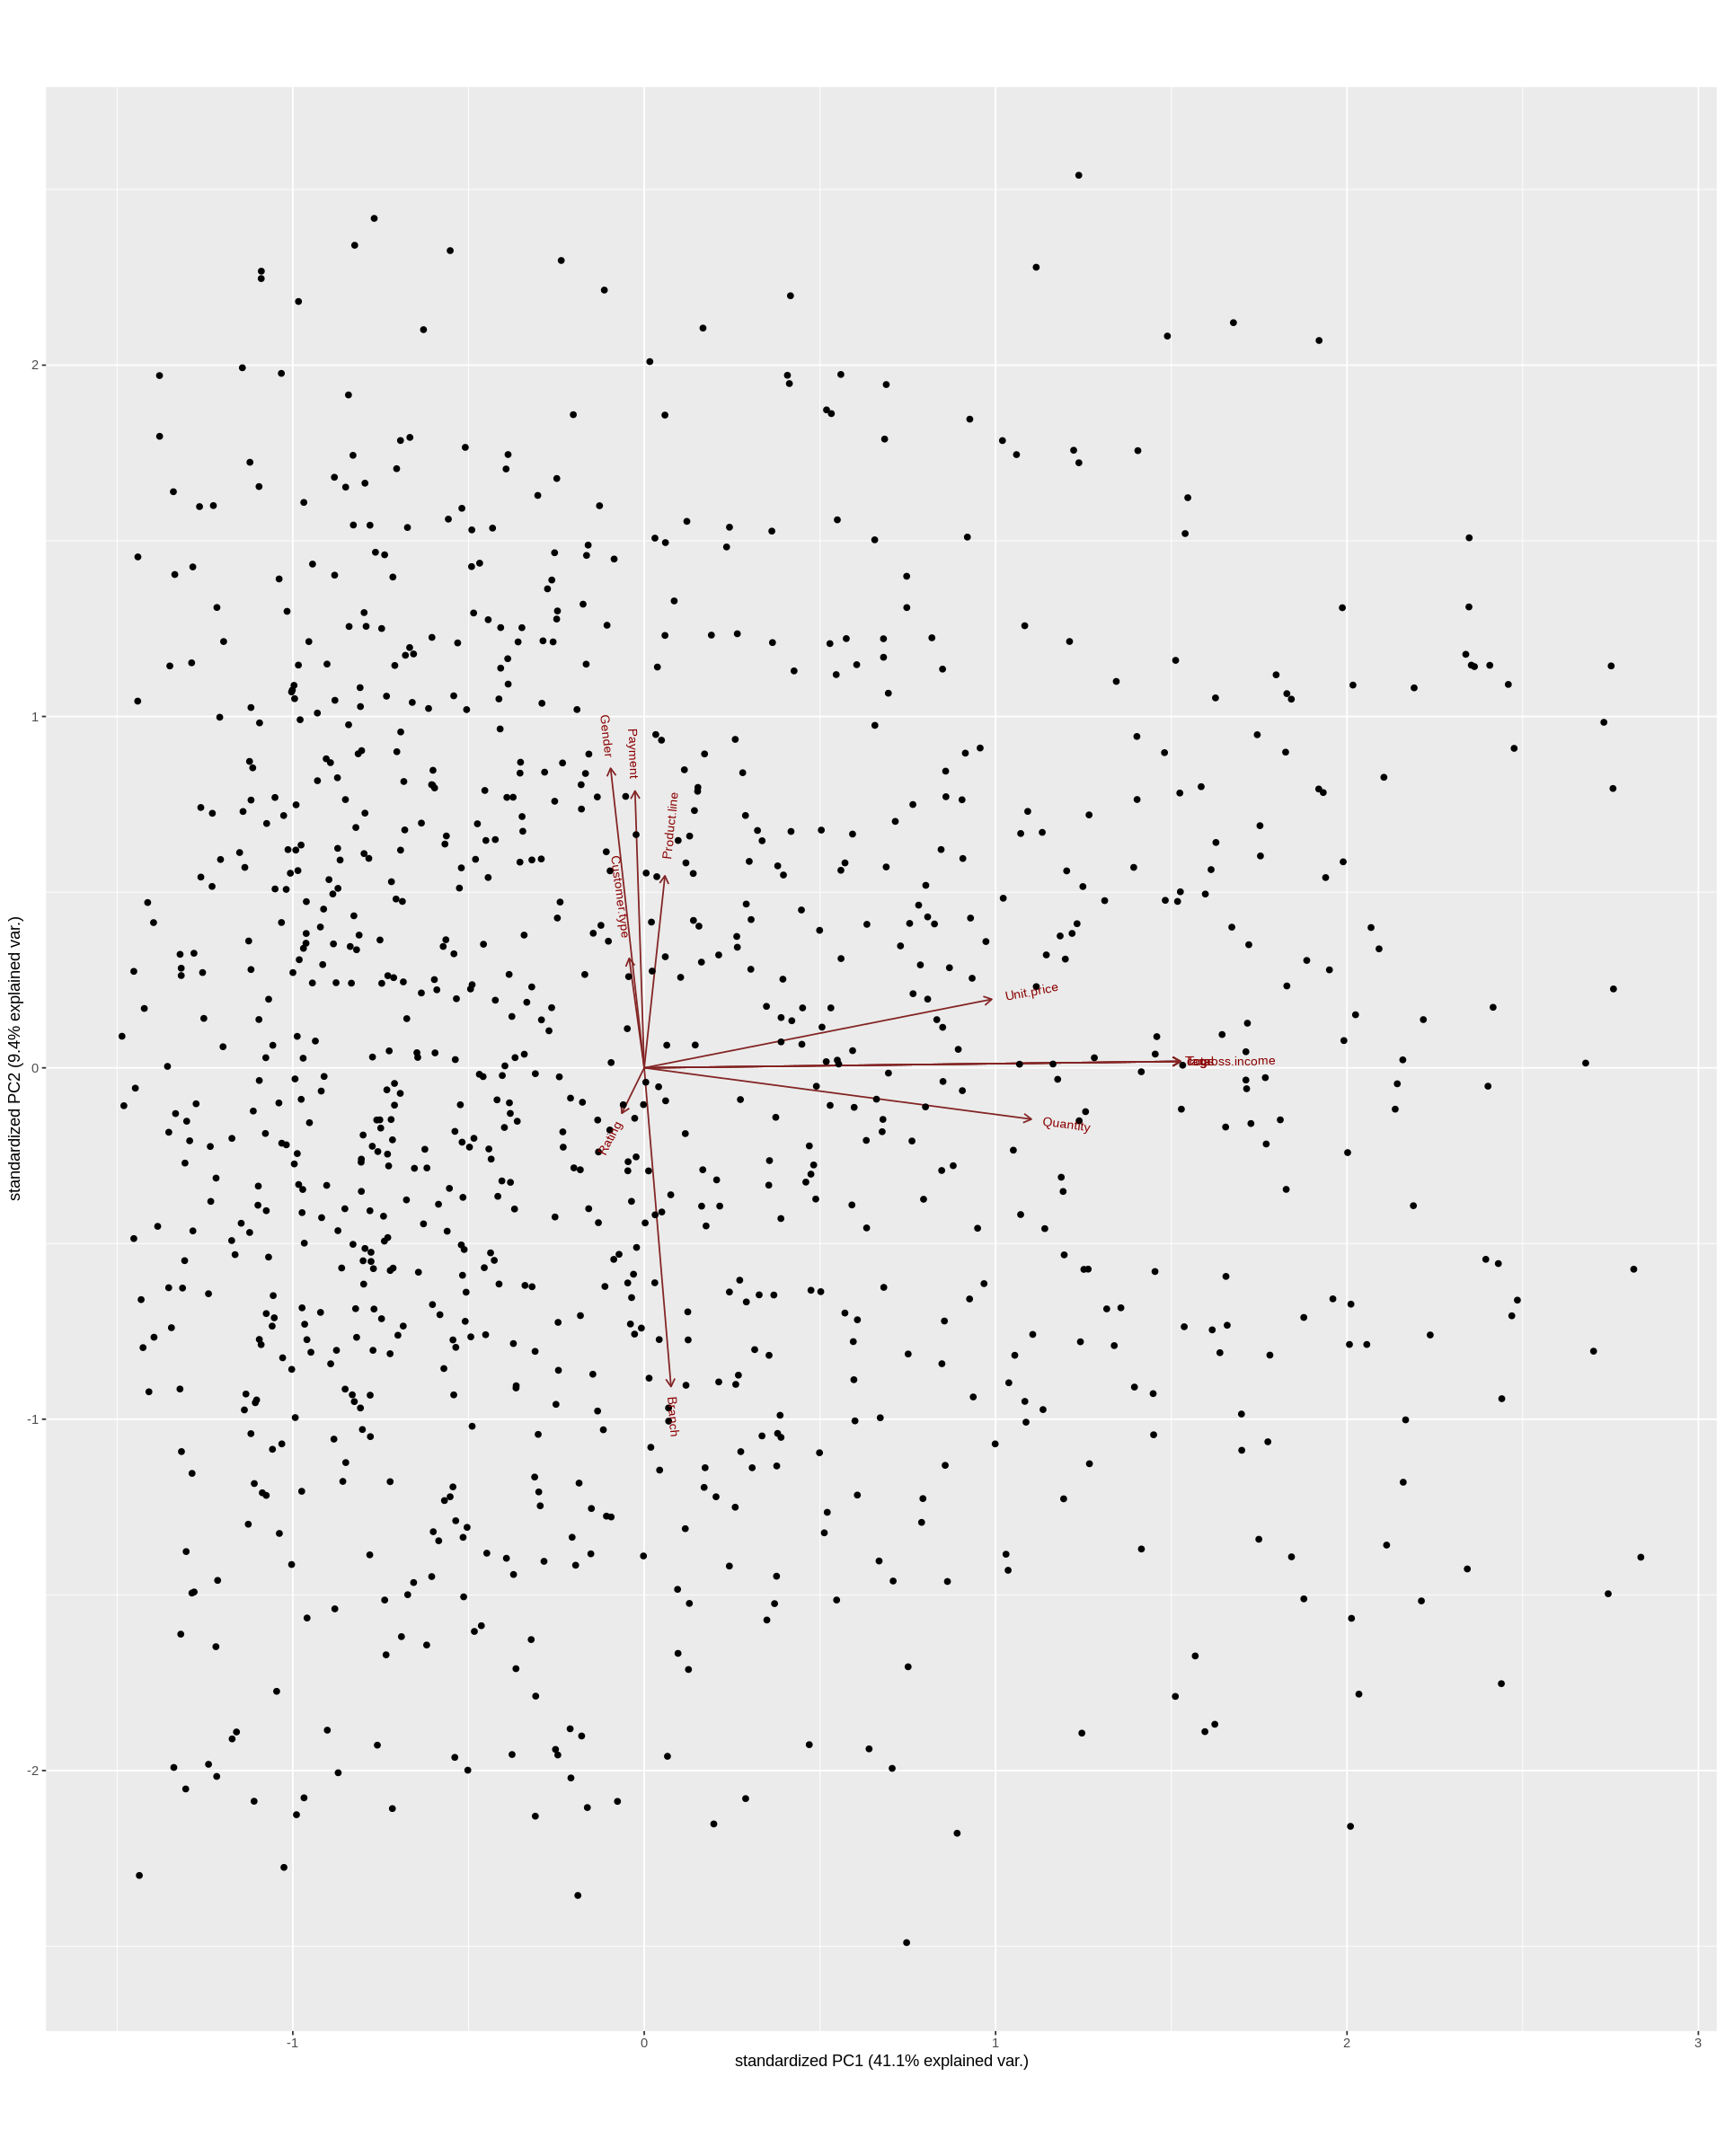

In [ ]:
# Then Loading our ggbiplot library
#  
library(ggbiplot)
ggbiplot(p_2.pca)

In [ ]:
# A table plot of the product line column
table(Product.line)

Product.line
Electronic accessories    Fashion accessories     Food and beverages 
                   170                    178                    174 
     Health and beauty     Home and lifestyle      Sports and travel 
                   152                    160                    166 

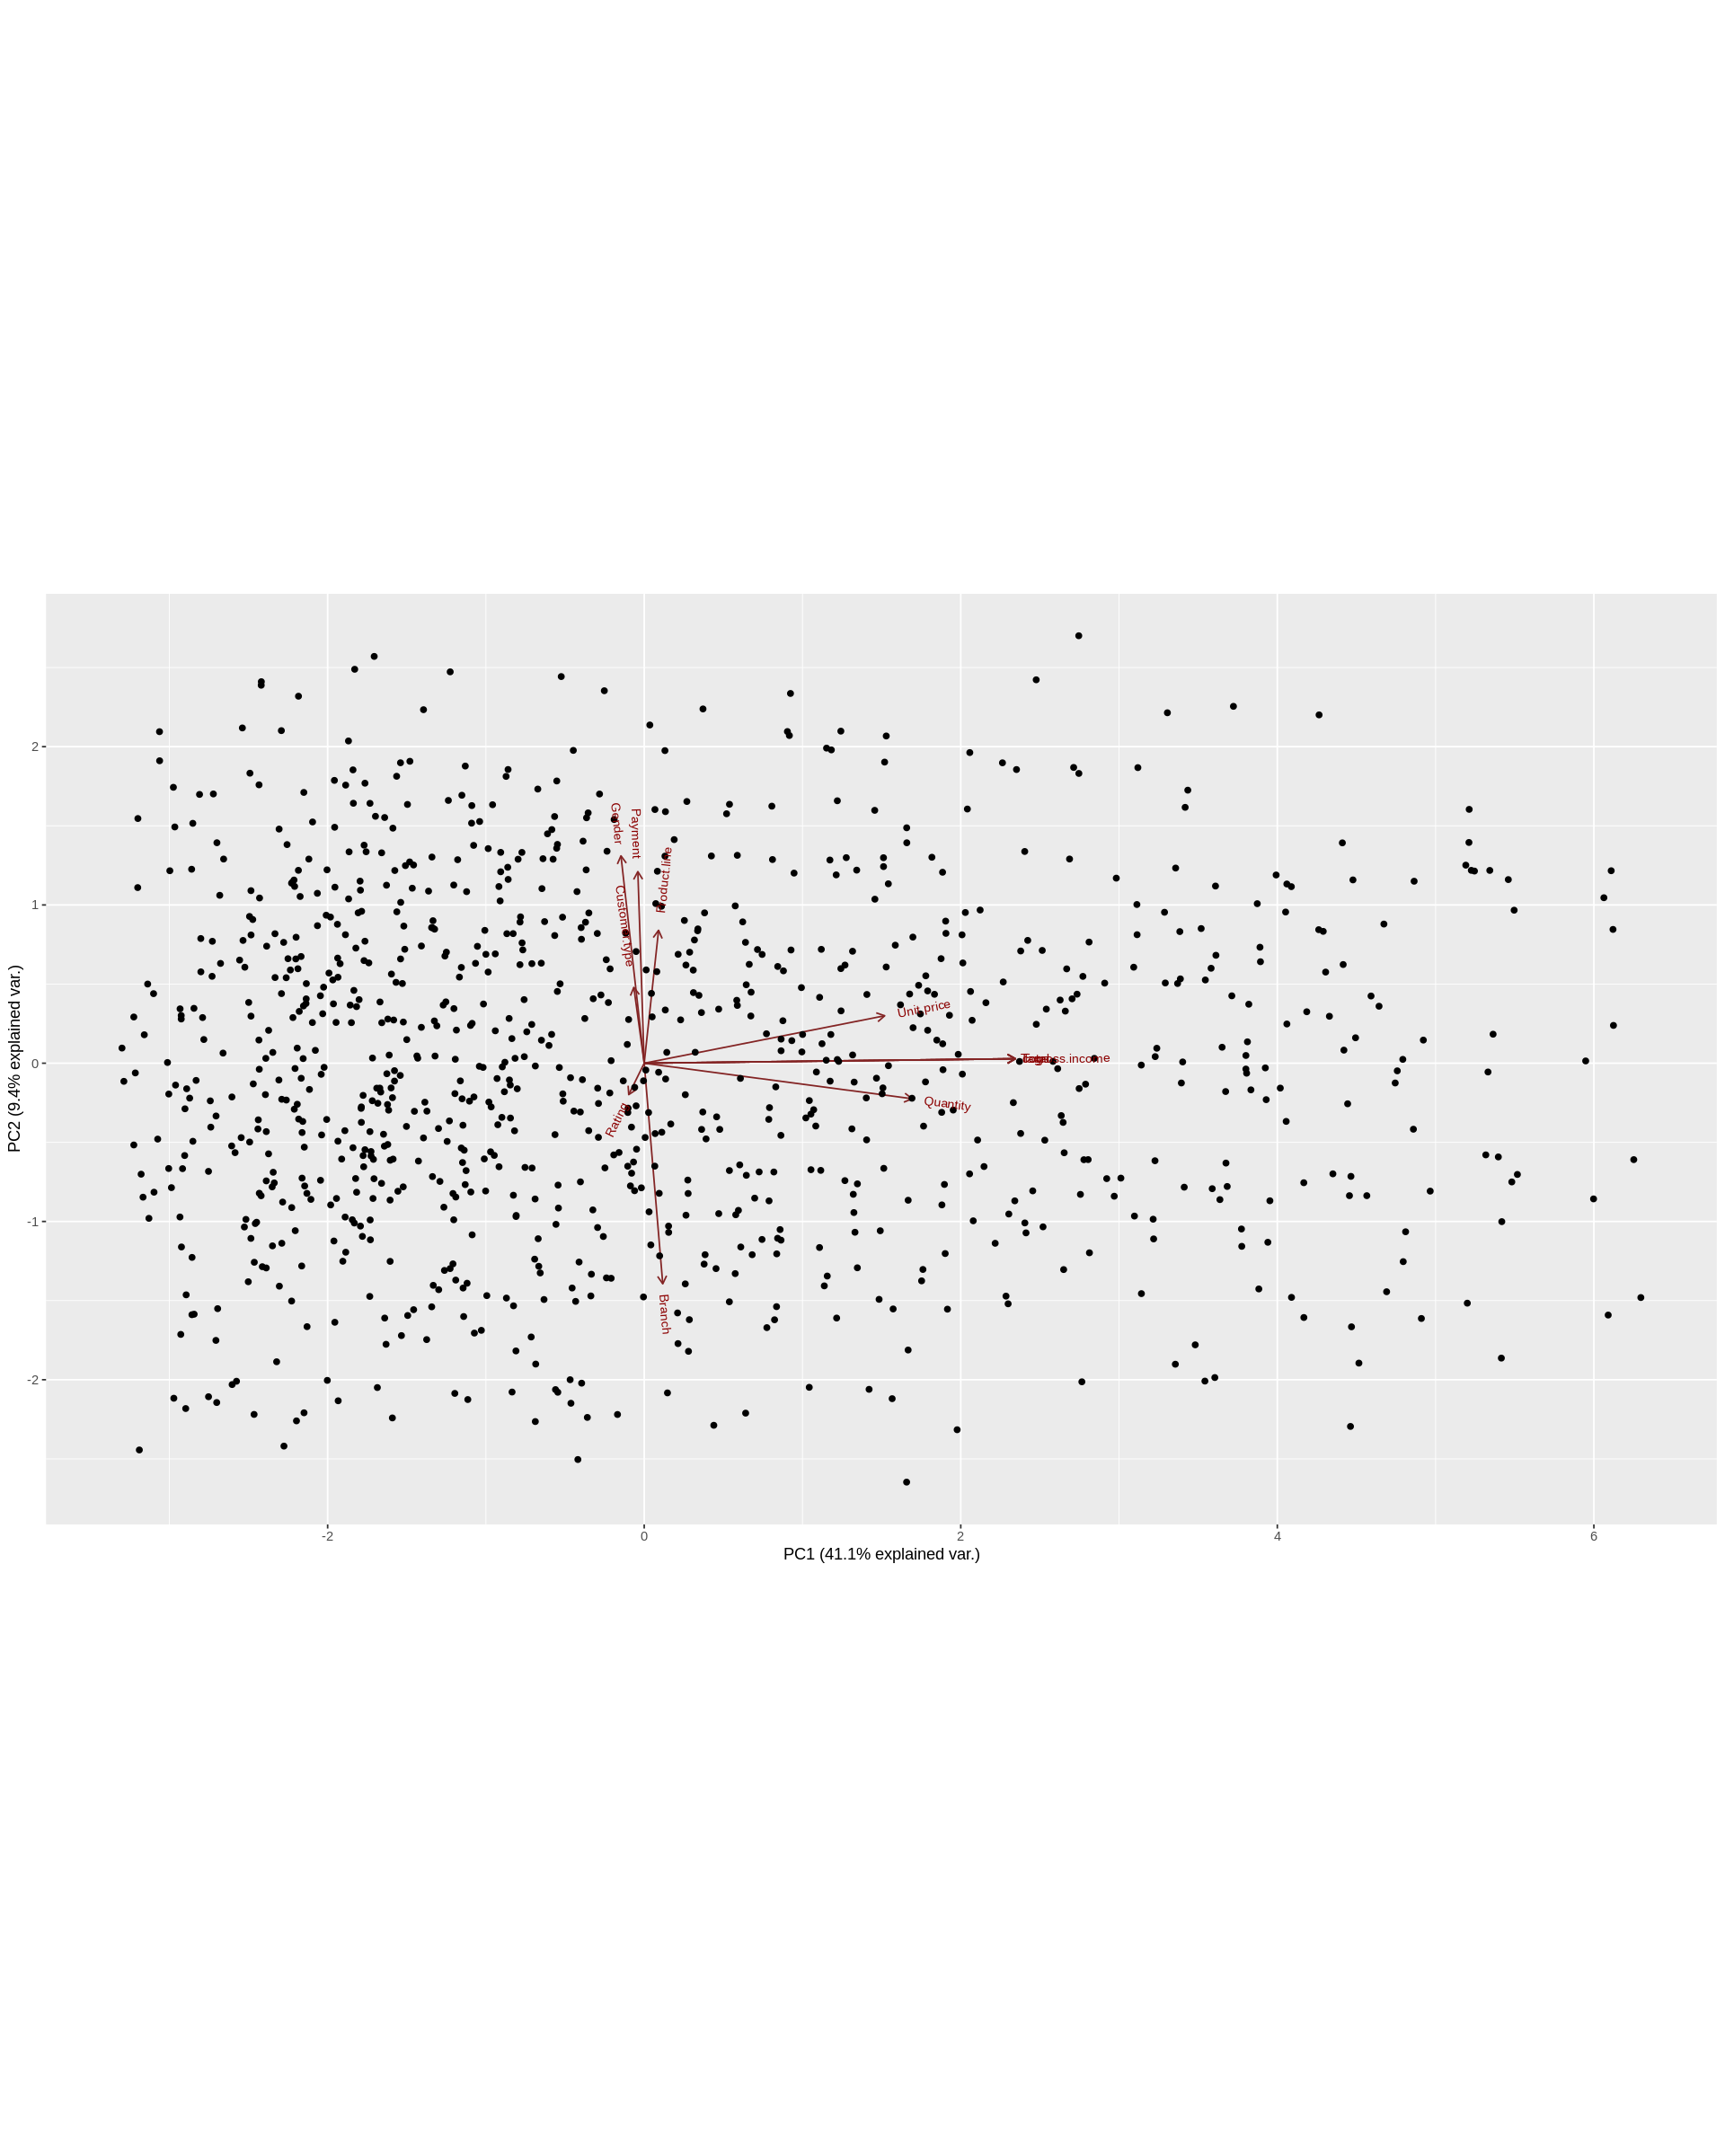

In [ ]:
# Adding more detail to the plot, we provide arguments rownames as labels
# 
ggbiplot(p_2.pca, labels=rownames(p1$Product.line), obs.scale = 1, var.scale = 1)

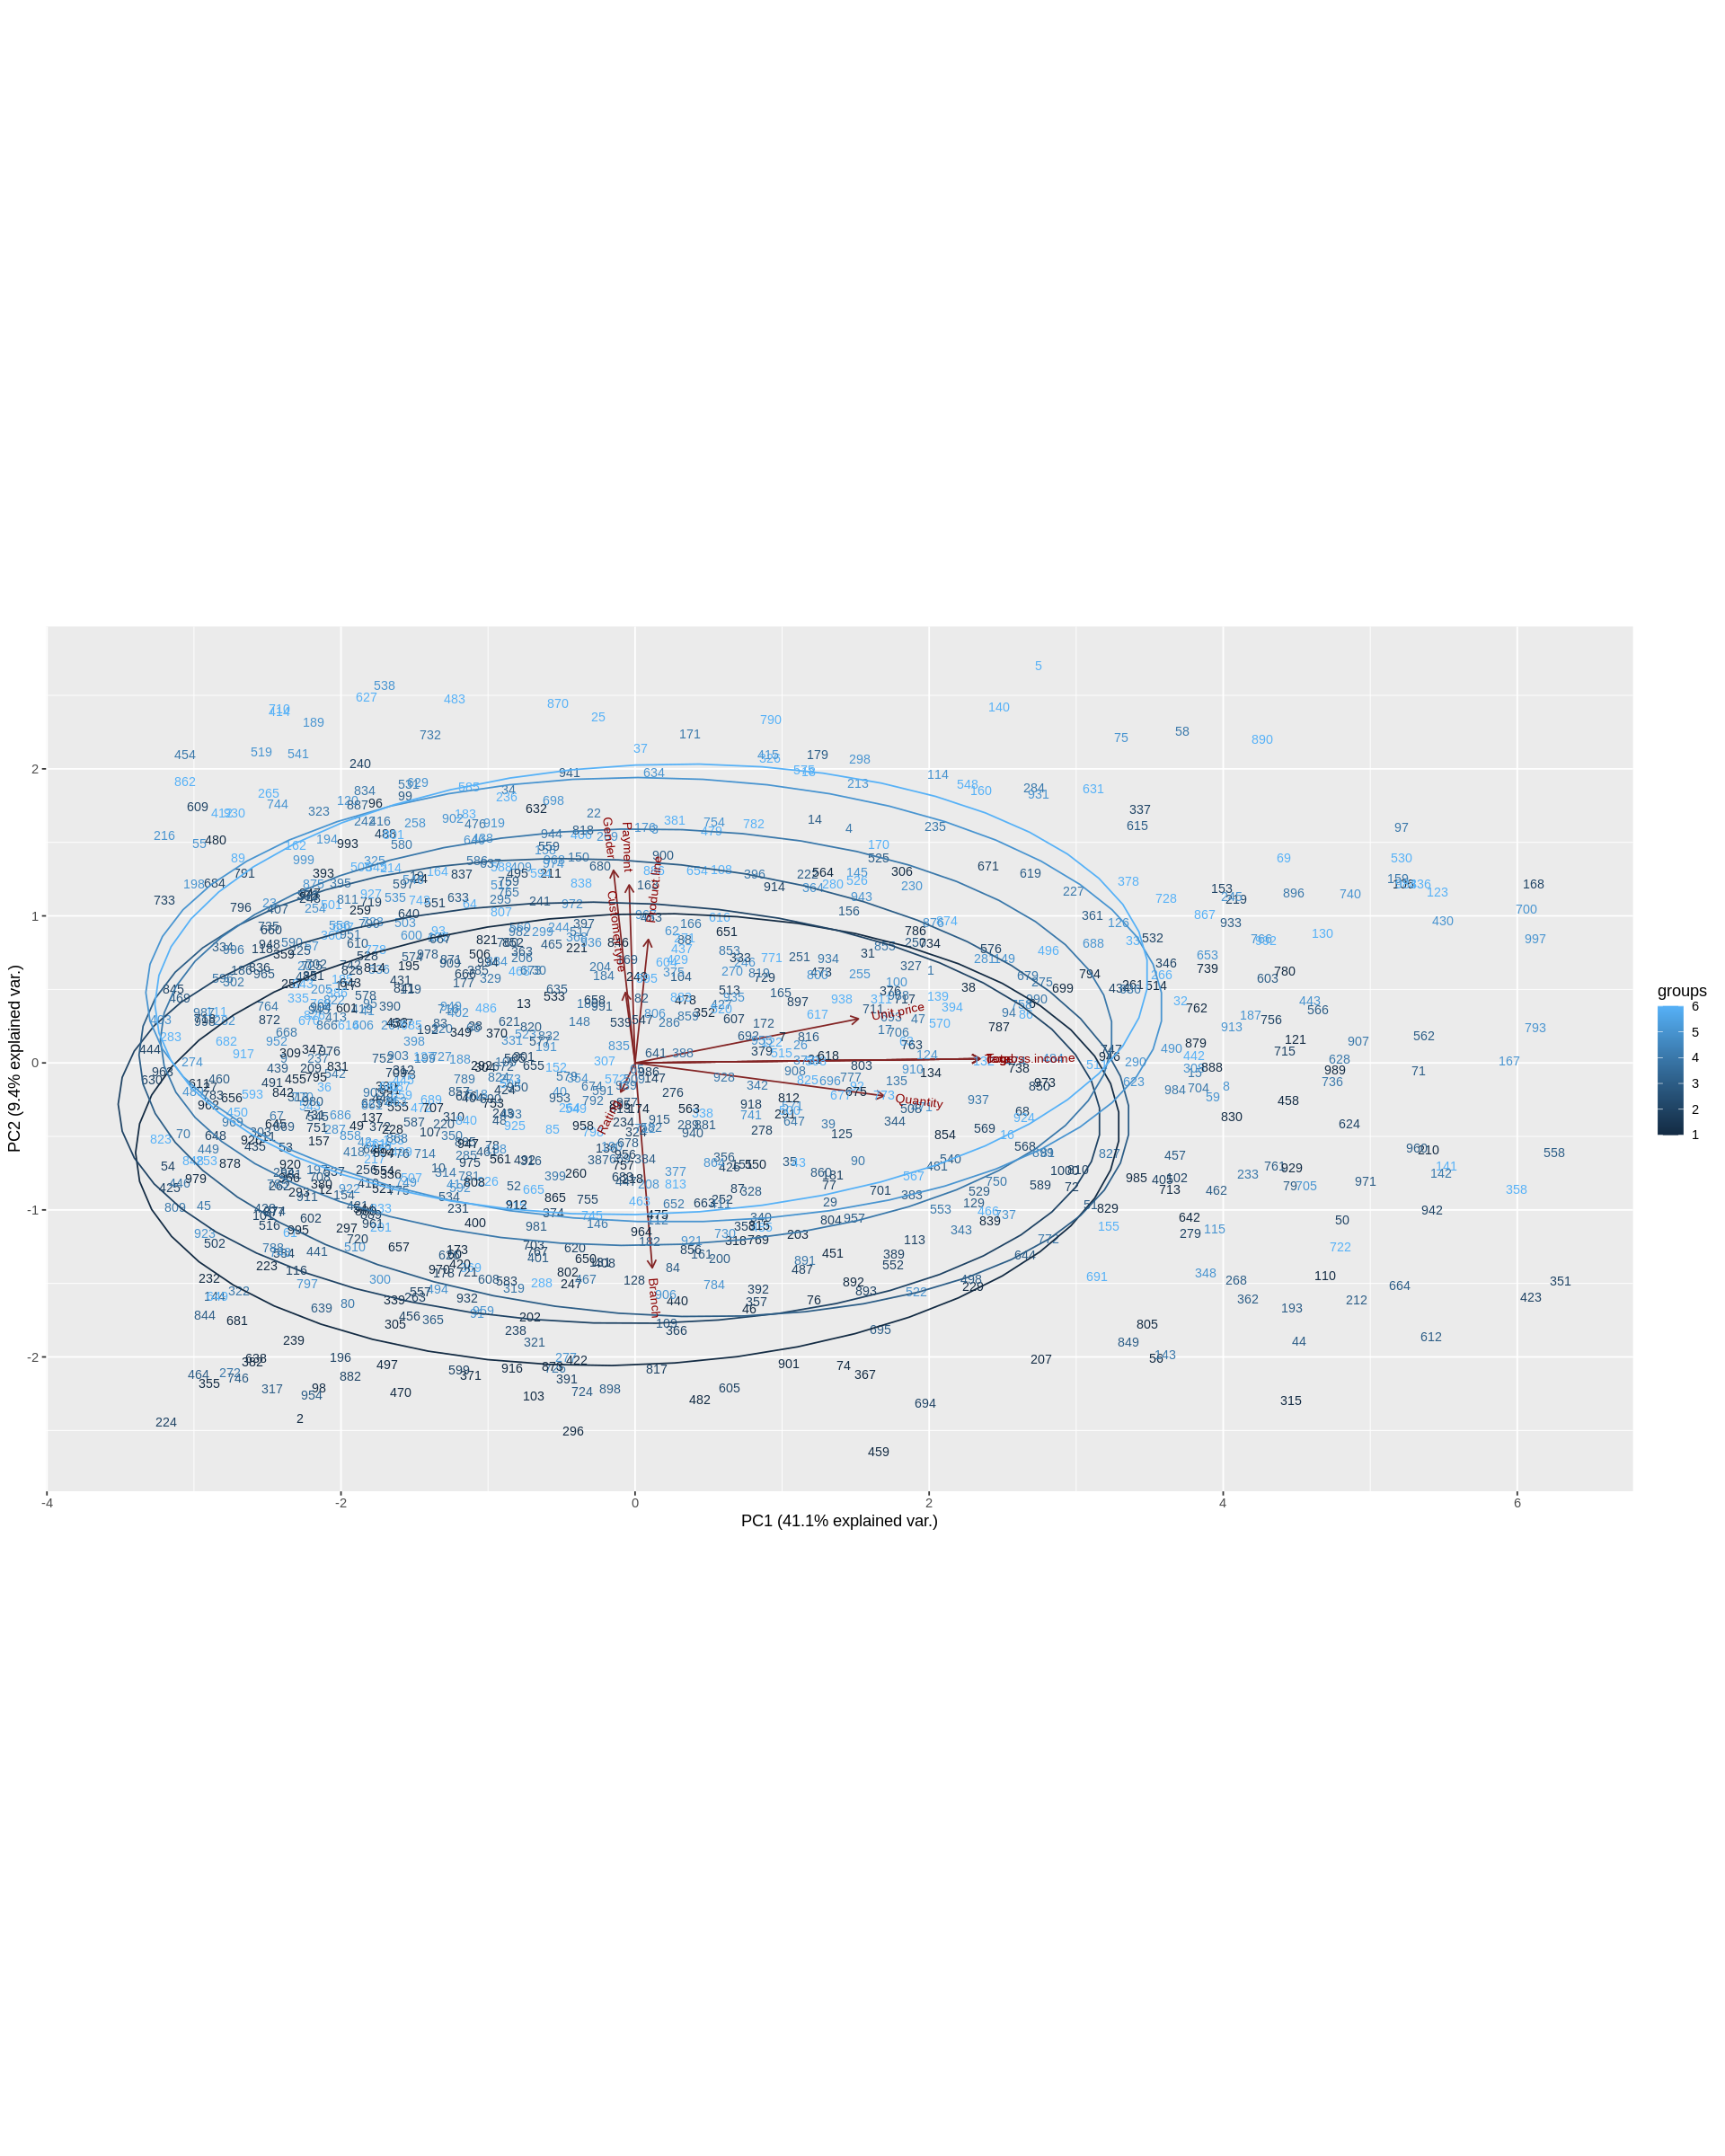

In [ ]:
# We can look at the product line of each variable by placing them into their respective categories

ggbiplot(p_2.pca,ellipse=TRUE,  labels=rownames(p1), groups=p1$Product.line, obs.scale = 1, var.scale = 1)

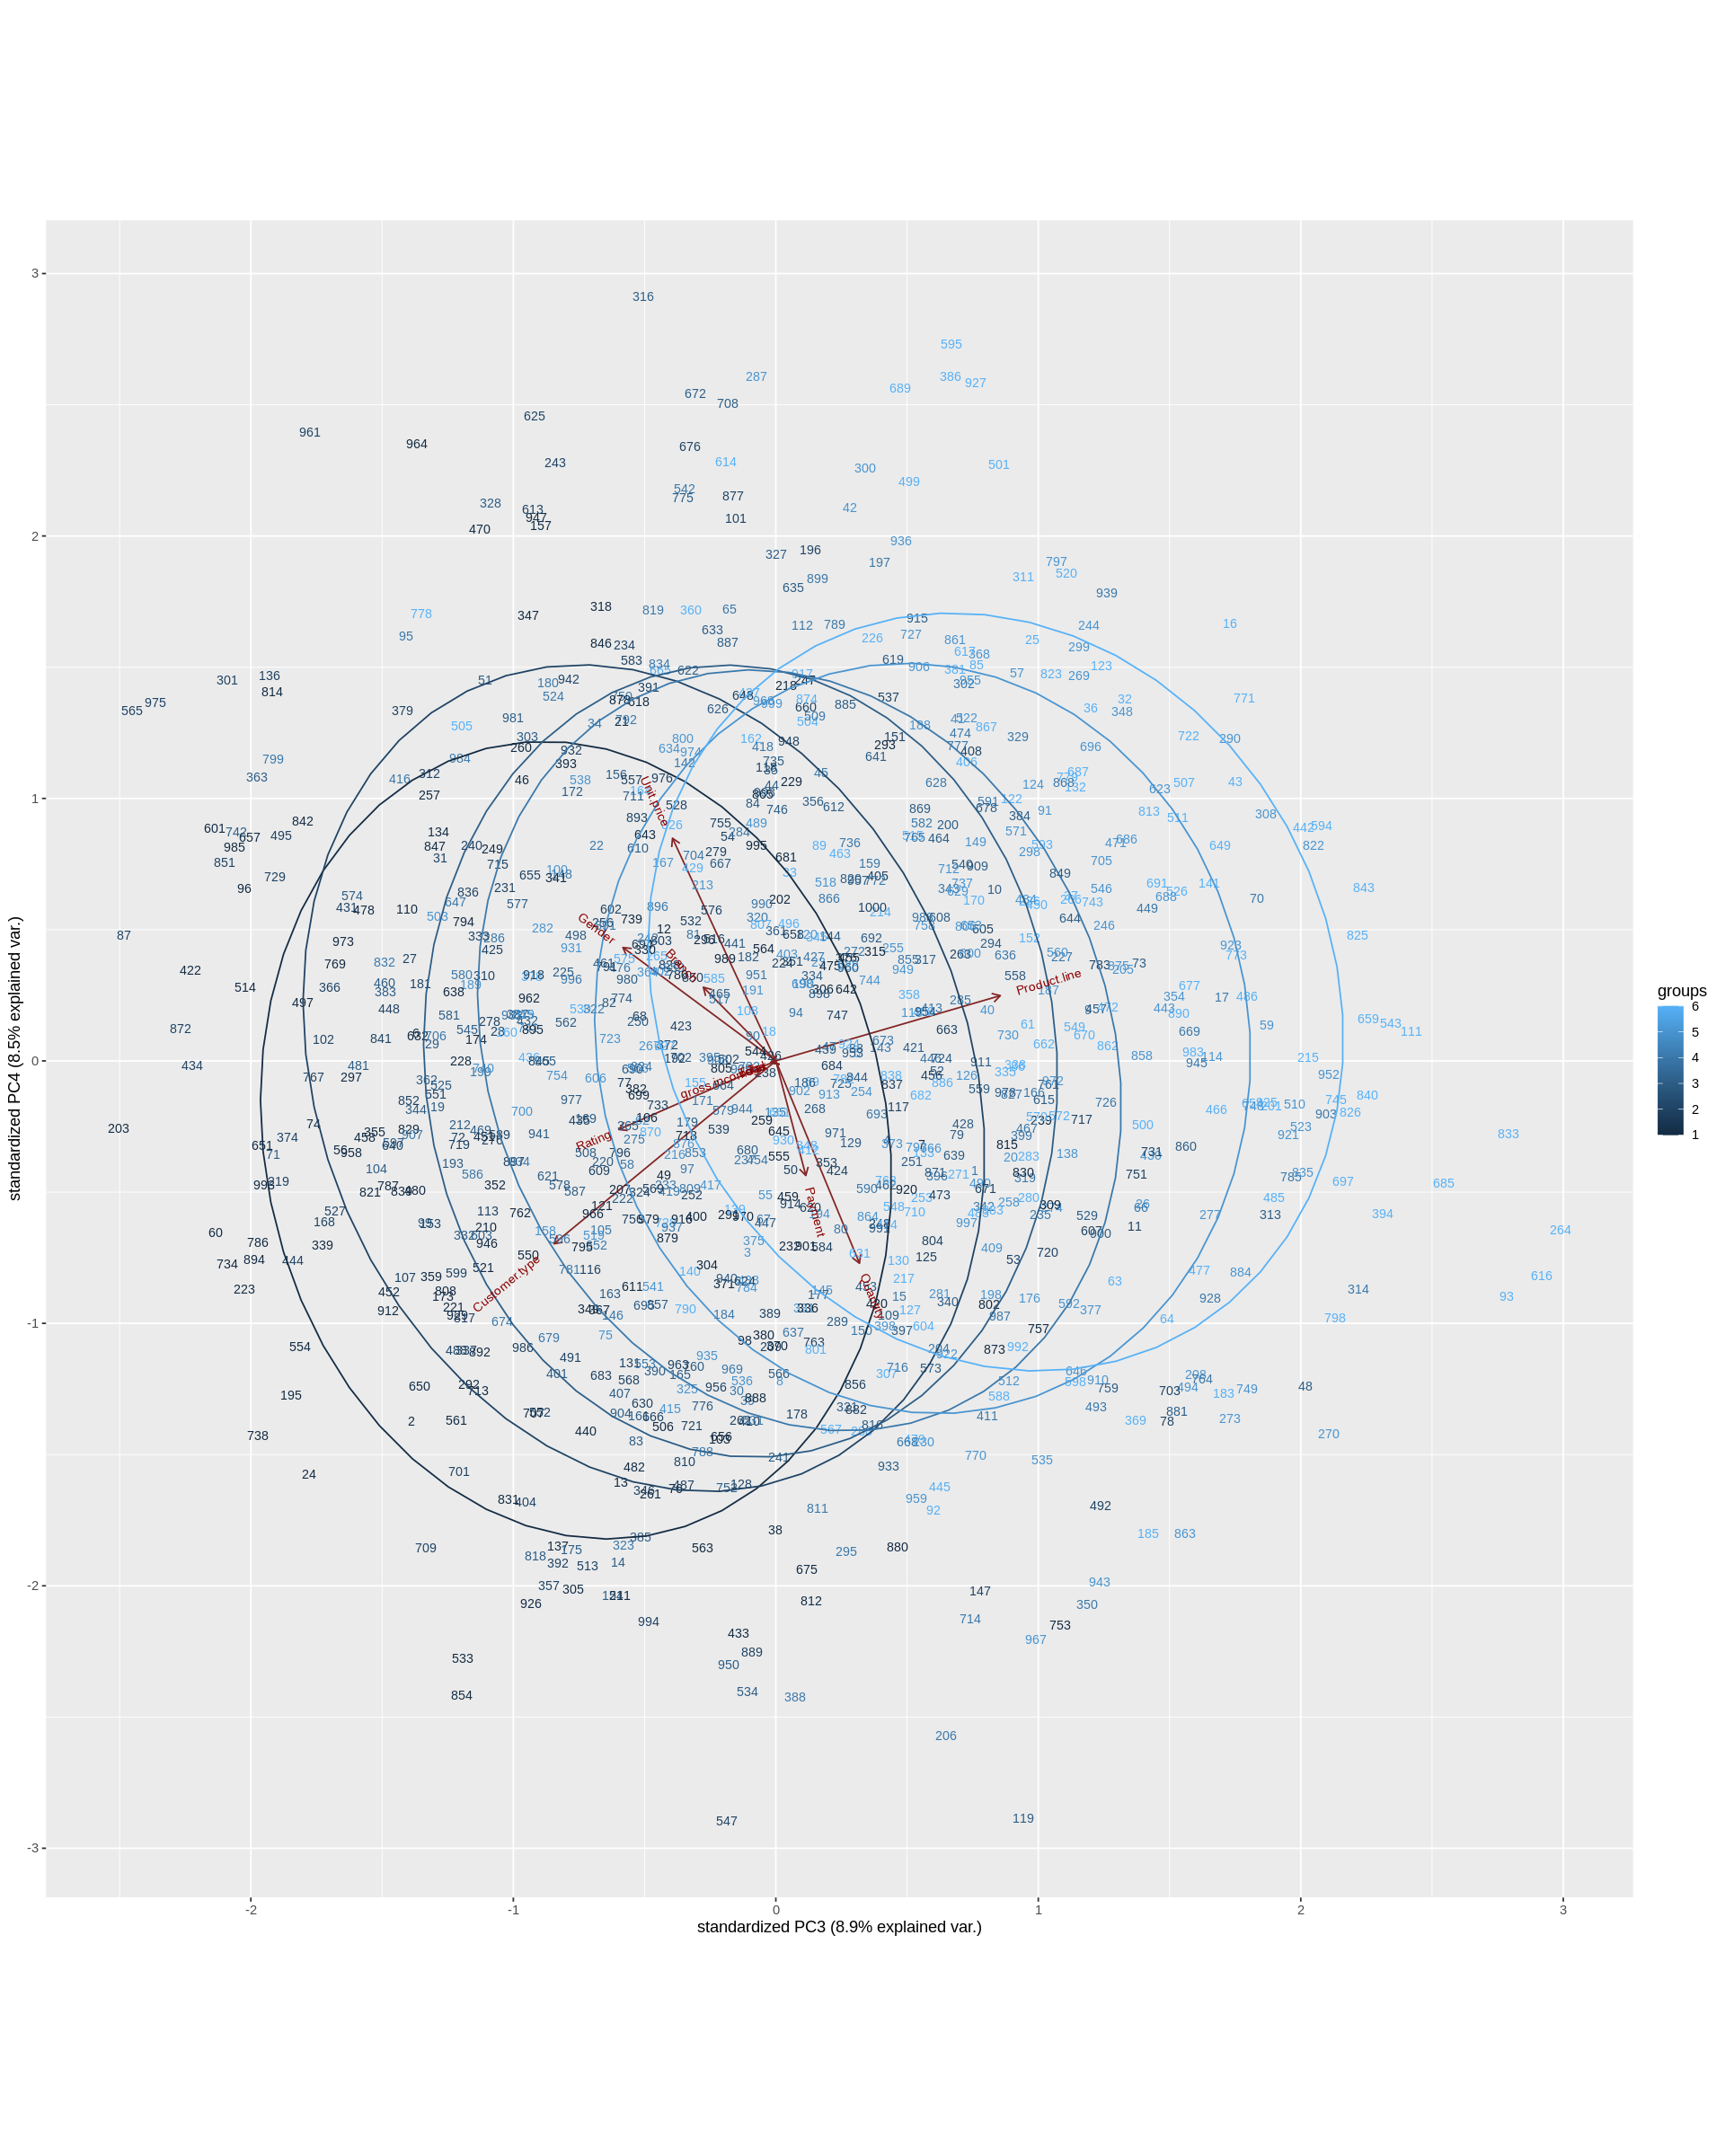

In [ ]:
# We now plot PC3 and PC4

ggbiplot(p_2.pca,ellipse=TRUE,choices=c(3,4),   labels=rownames(p1), groups=p1$Product.line)

# We find it difficult to derive insights from the given plot mainly because PC3 and PC4 
# explain very small percentages of the total variation, thus it would be surprising 
# if we found that they were very informative and separated the groups or revealed apparent patterns.

## T-SNE

In [ ]:
# Previewing the original dataset
head(p1)

Invoice.ID  Branch Customer.type Gender Product.line Unit.price Quantity
1 750-67-8428 1      1             1      4            74.69      7       
2 226-31-3081 3      2             1      1            15.28      5       
3 631-41-3108 1      2             2      5            46.33      7       
4 123-19-1176 1      1             2      4            58.22      8       
5 373-73-7910 1      2             2      6            86.31      7       
6 699-14-3026 3      2             2      1            85.39      7       
  Tax     Date      Time  Payment cogs   gross.margin.percentage gross.income
1 26.1415 1/5/2019  13:08 3       522.83 4.761905                26.1415     
2  3.8200 3/8/2019  10:29 1        76.40 4.761905                 3.8200     
3 16.2155 3/3/2019  13:23 2       324.31 4.761905                16.2155     
4 23.2880 1/27/2019 20:33 3       465.76 4.761905                23.2880     
5 30.2085 2/8/2019  10:37 3       604.17 4.761905                30.2085     
6 29.8865 3/25/2019 18:30 3       597.73 4.761905                29.8865     
  Rating Total   
1 9.1    548.9715
2 9.6     80.2200
3 7.4    340.5255
4 8.4    489.0480
5 5.3    634.3785
6 4.1    627.6165

In [ ]:
# Package for performing t-SNE
# Installing Rtnse package
# 
install.packages("Rtsne")

# Loading our tnse library

library(Rtsne)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Curating the database for analysis 
# Using the Invoice  Id as our label column

Labels <- p1$Invoice.ID
p1$Invoice.ID <- as.factor(p1$Invoice.ID)

# For plotting
#
colors = rainbow(length(unique(p1$Invoice.ID)))
names(colors) = unique(p1$Invoice.ID)

In [ ]:
# Executing the algorithm on curated data
# 
tsne <- Rtsne(p1[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500)


Performing PCA
Read the 1000 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.11 seconds (sparsity = 0.101276)!
Learning embedding...
Iteration 50: error is 61.286208 (50 iterations in 0.16 seconds)
Iteration 100: error is 51.582702 (50 iterations in 0.12 seconds)
Iteration 150: error is 50.170157 (50 iterations in 0.12 seconds)
Iteration 200: error is 49.649598 (50 iterations in 0.12 seconds)
Iteration 250: error is 49.474201 (50 iterations in 0.12 seconds)
Iteration 300: error is 0.576439 (50 iterations in 0.12 seconds)
Iteration 350: error is 0.404095 (50 iterations in 0.13 seconds)
Iteration 400: error is 0.356737 (50 iterations in 0.13 seconds)
Iteration 450: error is 0.337725 (50 iterations in 0.12 seconds)
Iteration 500: error is 0.325082 (50 iterations in 0.12 seconds)
Fitting performed in 1.26 seconds.


In [ ]:
# Getting the duration of execution
# 
exeTimeTsne <- system.time(Rtsne(p1[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500))

Performing PCA
Read the 1000 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.16 seconds (sparsity = 0.101276)!
Learning embedding...
Iteration 50: error is 59.314203 (50 iterations in 0.19 seconds)
Iteration 100: error is 51.826613 (50 iterations in 0.17 seconds)
Iteration 150: error is 50.770269 (50 iterations in 0.18 seconds)
Iteration 200: error is 50.386895 (50 iterations in 0.18 seconds)
Iteration 250: error is 50.163140 (50 iterations in 0.19 seconds)
Iteration 300: error is 0.539843 (50 iterations in 0.18 seconds)
Iteration 350: error is 0.379800 (50 iterations in 0.17 seconds)
Iteration 400: error is 0.341309 (50 iterations in 0.17 seconds)
Iteration 450: error is 0.324450 (50 iterations in 0.17 seconds)
Iteration 500: error is 0.316325 (50 iterations in 0.16 seconds)
Fitting performed in 1.74 seconds.


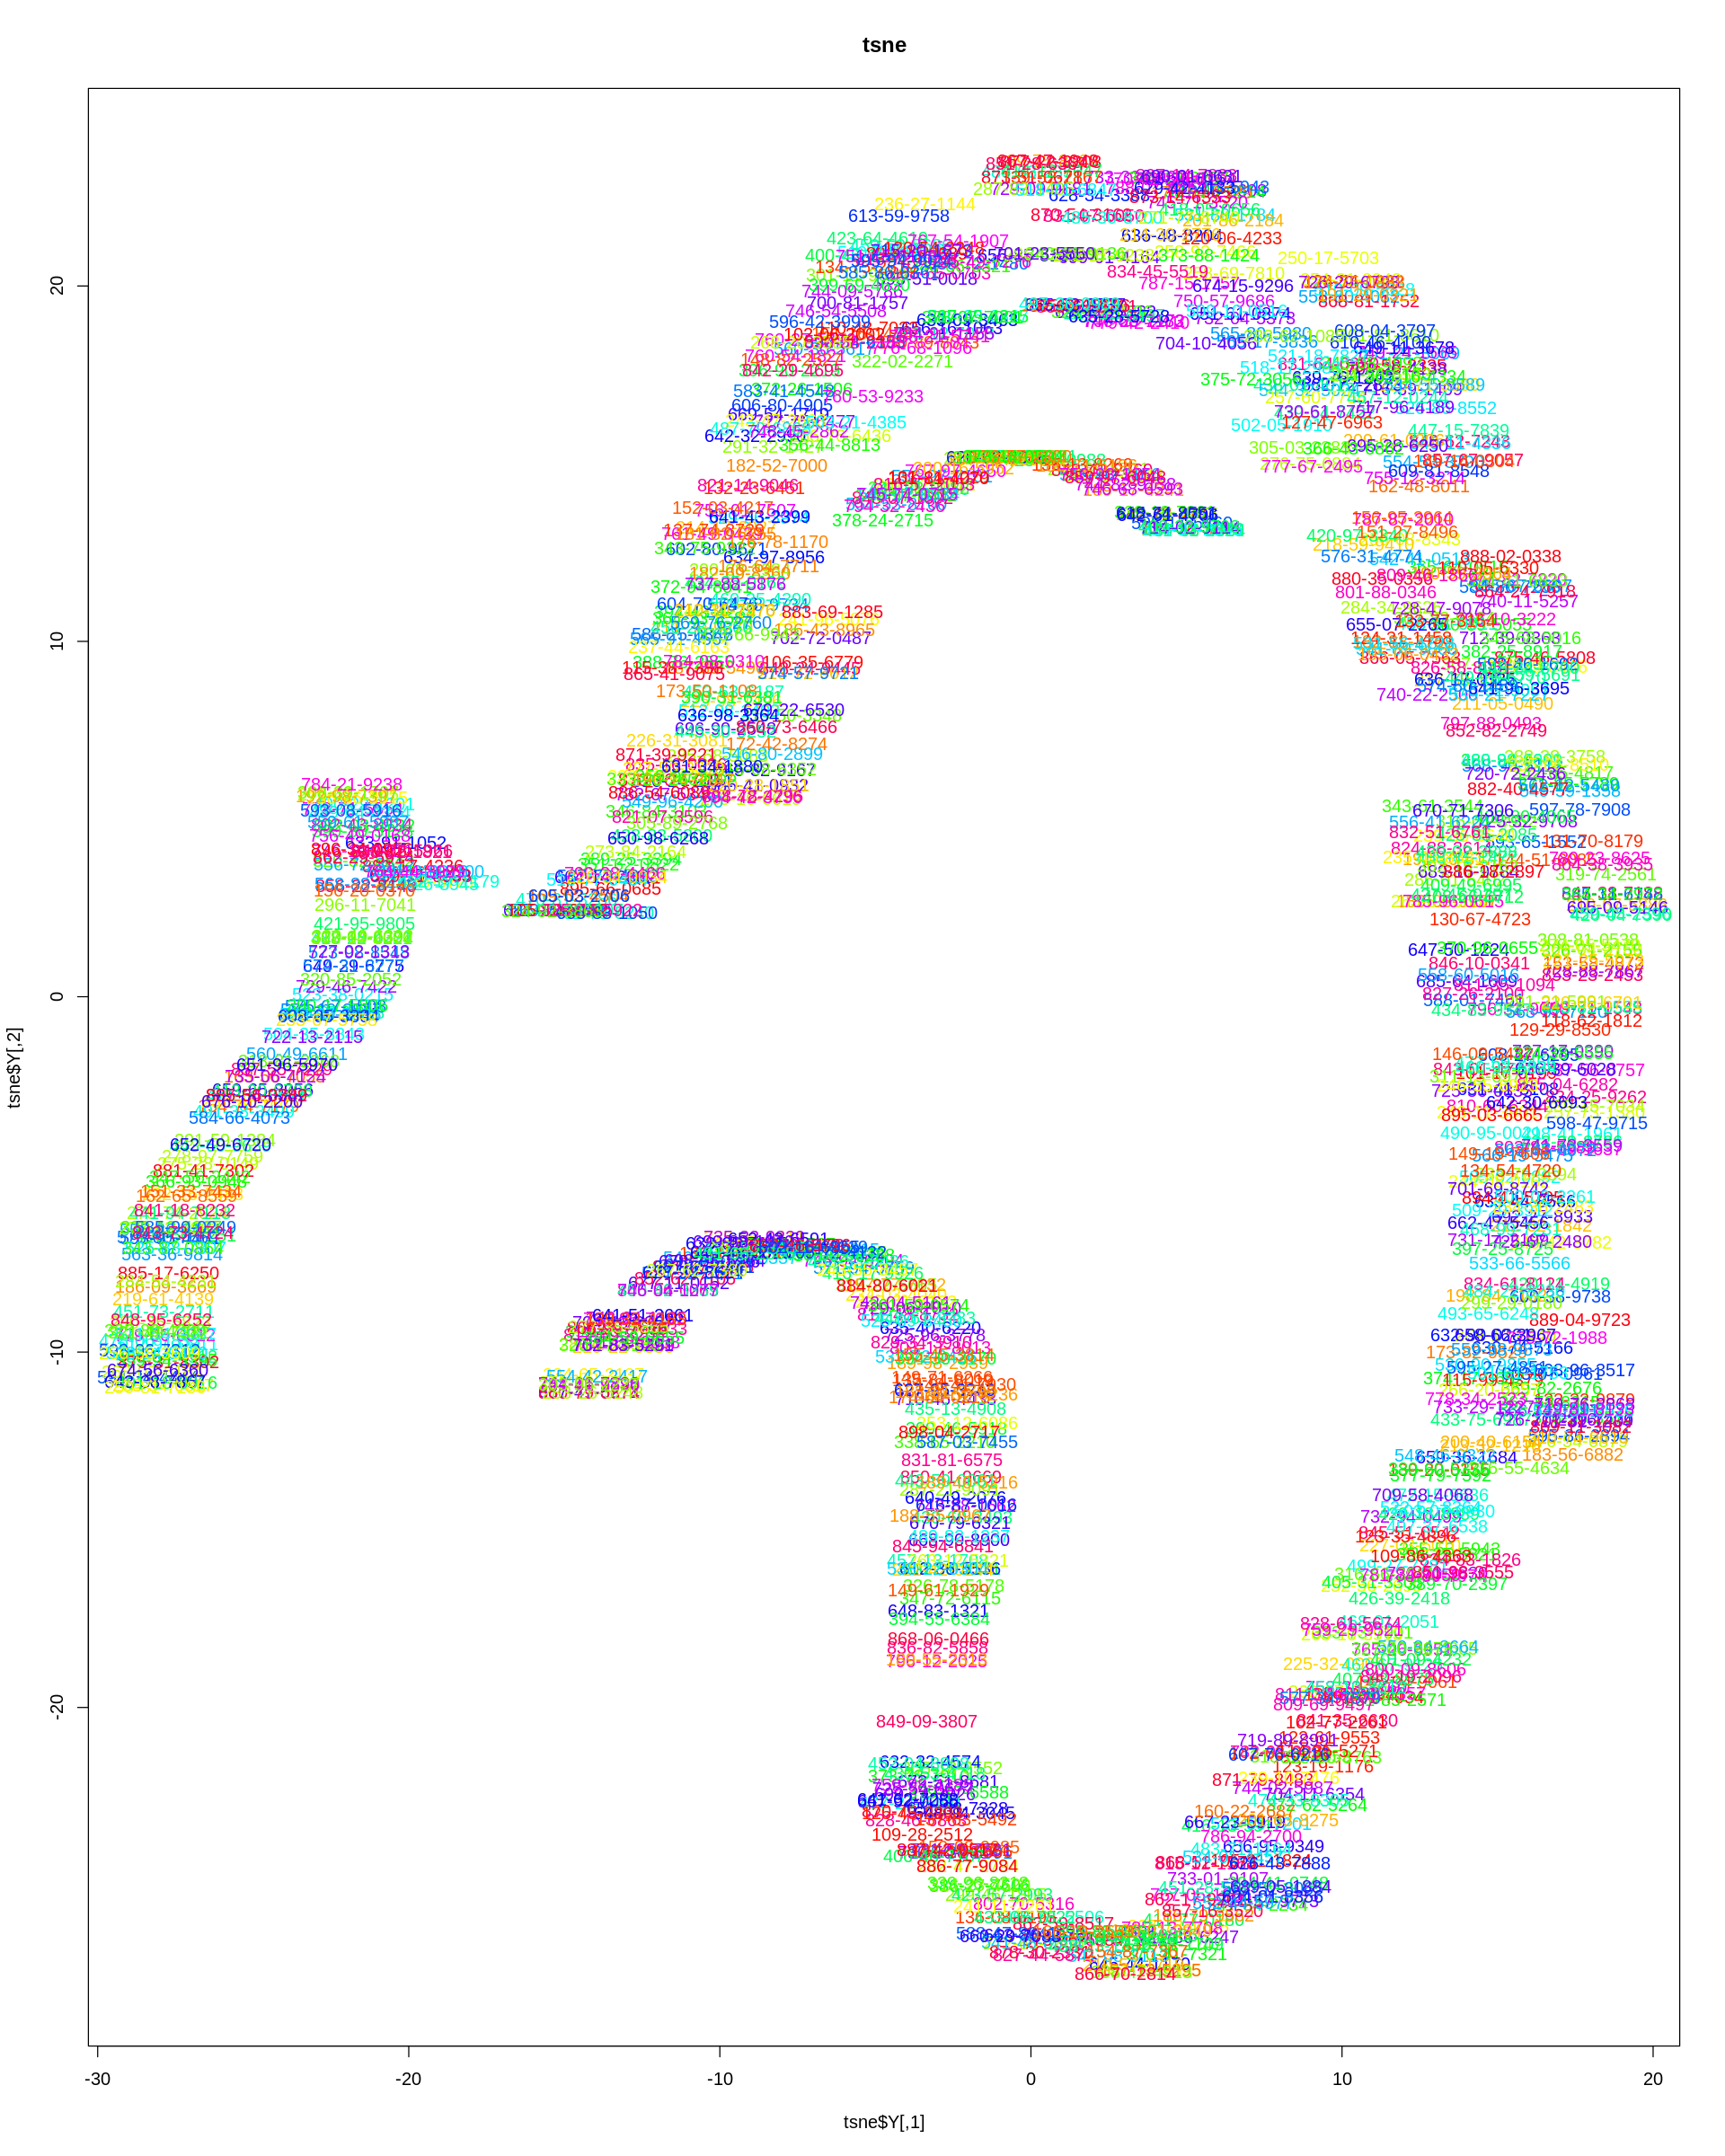

In [ ]:
# Plotting our graph and closely examining the graph
# 

plot(tsne$Y, t='n', main="tsne")
text(tsne$Y, labels=p1$Invoice.ID, col=colors[p1$Invoice.ID])

# Conclusion

* PCA provided a 91.127% explanation of the variance while T-SNE provided a 61.28% at 50 itterations of the explained variance
* The PCA provided better compared to the T-SNE dimensionality reduction tecnique.